**MULTIDOCUMENT TEXT SUMMARIZATION**

*Setting google collab*

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# untuk mount gdrive
!pip install -U -q PyDrive

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth

# untuk kasih akses ke gdrive
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

**READ DATASET**

In [ ]:
import pandas as pd 

data = pd.read_excel('drive/My Drive/KULIAH/skripsi/raw/dataset_pakar.xlsx')

**PREPROCESSING**

*a. Text Combining*

In [ ]:
for i in range(len(data)):
  data['combined_news'] = data[['Portal Kompas.com', 'Portal CNN']].apply(lambda x: ' '.join(x), axis=1)

*c. Sentence tokenizing (Teks di pisah menjadi kalimat-kalimat)*

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import sent_tokenize
import numpy as np

news = []
tokenized = []
for index, row in data.iterrows():
  news.append(data['combined_news'][index])
  tokenized.append(sent_tokenize(news[index]))

np.array(tokenized, dtype="O")
data['tokenized'] = pd.DataFrame({"a": tokenized})

*b. Stop words removal (Menghapus kata tidak penting dari kamus sastrawi)*



In [ ]:
!pip install Sastrawi

     |████████████████████████████████| 215kB 8.8MB/s 


In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
 
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

filtered = []
for i in range(len(data)):
  temp = []
  for j in range(len(data['tokenized'][i])):
    temp.append(stopword.remove(data['tokenized'][i][j]))
  filtered.append(temp)

data['filtered'] = pd.DataFrame({"b": filtered})

*d. Stemming (Menghilangkan imbuhan)*

In [ ]:
# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# factory = StemmerFactory()
# stemmer = factory.create_stemmer()

# stemmed = []
# for i in range(len(data)):
#   temp = []
#   for j in range(len(data['filtered'][i])):
#     temp.append(stemmer.stem(data['filtered'][i][j]))
#   stemmed.append(temp)
#   temp = []

# data['stemmed'] = pd.DataFrame({"b": stemmed})

In [ ]:
# import pickle
# pickle.dump(stemmed, open("drive/My Drive/KULIAH/skripsi/test/stemmed/stemmed_TFIDF_global_7500_sampai_30k.p", "wb"))

In [ ]:
import pickle
data['stemmed'] = pickle.load(open("drive/My Drive/KULIAH/skripsi/test/stemmed/stemmed_TFIDF_global_7500_sampai_30k.p", "rb" ))

*e. Word tokenize per sentence (Kalimat di token)*

In [ ]:
word_tokenize = []
for i in range(len(data)):
  temp2 = []
  for j in range(len(data['stemmed'][i])):
    temp2.append(data['stemmed'][i][j].split(" "))
  word_tokenize.append(temp2)
  temp2 = []

data['word_tokenized'] = pd.DataFrame({"b": word_tokenize})

**PROSES**

***1. TextRank***

*    a. Perolehan data train pada berita kompas dan CNN dalam 1 tahun terakhir

In [ ]:
import pickle

pickle_3000 = pickle.load(open("drive/My Drive/KULIAH/skripsi/train/dataStemming_3000.p", "rb" ))
pickle_6000 = pickle.load(open("drive/My Drive/KULIAH/skripsi/train/dataStemming_6000.p", "rb" ))
pickle_9000 = pickle.load(open("drive/My Drive/KULIAH/skripsi/train/dataStemming_9000.p", "rb" ))
pickle_12000 = pickle.load(open("drive/My Drive/KULIAH/skripsi/train/dataStemming_12000.p", "rb" ))
pickle_15000 = pickle.load(open("drive/My Drive/KULIAH/skripsi/train/dataStemming_15000.p", "rb" ))
pickle_18000 = pickle.load(open("drive/My Drive/KULIAH/skripsi/train/dataStemming_18000.p", "rb" ))
pickle_21000 = pickle.load(open("drive/My Drive/KULIAH/skripsi/train/dataStemming_21000.p", "rb" ))
pickle_24000 = pickle.load(open("drive/My Drive/KULIAH/skripsi/train/dataStemming_24000.p", "rb" ))
pickle_27000 = pickle.load(open("drive/My Drive/KULIAH/skripsi/train/dataStemming_27000.p", "rb" ))
pickle_30000 = pickle.load(open("drive/My Drive/KULIAH/skripsi/train/dataStemming_30000.p", "rb" ))
pickle_33000 = pickle.load(open("drive/My Drive/KULIAH/skripsi/train/dataStemming_33000.p", "rb" ))
pickle_36000 = pickle.load(open("drive/My Drive/KULIAH/skripsi/train/dataStemming_36000.p", "rb" ))
pickle_39000 = pickle.load(open("drive/My Drive/KULIAH/skripsi/train/dataStemming_39000.p", "rb" ))
pickle_42000 = pickle.load(open("drive/My Drive/KULIAH/skripsi/train/dataStemming_42000.p", "rb" ))
pickle_45000 = pickle.load(open("drive/My Drive/KULIAH/skripsi/train/dataStemming_45000.p", "rb" ))
pickle_48000 = pickle.load(open("drive/My Drive/KULIAH/skripsi/train/dataStemming_48000.p", "rb" ))
pickle_51000 = pickle.load(open("drive/My Drive/KULIAH/skripsi/train/dataStemming_51000.p", "rb" ))
pickle_54000 = pickle.load(open("drive/My Drive/KULIAH/skripsi/train/dataStemming_54000.p", "rb" ))
pickle_57000 = pickle.load(open("drive/My Drive/KULIAH/skripsi/train/dataStemming_57000.p", "rb" ))
pickle_60000 = pickle.load(open("drive/My Drive/KULIAH/skripsi/train/dataStemming_60000.p", "rb" ))

train = pickle_3000 + pickle_6000 + pickle_9000 + pickle_12000 + pickle_15000 + pickle_18000 + pickle_21000 + pickle_24000 + pickle_27000 + pickle_30000 + pickle_33000 + pickle_36000 + pickle_39000 + pickle_42000 + pickle_45000 + pickle_48000 + pickle_51000 + pickle_54000 + pickle_57000 + pickle_60000

*    b. Membangun dan melatih model dengan max_feature 30000 menggunakan data train

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(1,2), max_df=0.95, min_df=10, max_features=30000)
vectorizer.fit(train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.95,
                max_features=30000, min_df=10, ngram_range=(1, 2), norm='l2',
                preprocessor=None, smooth_idf=True, stop_words=None,
                strip_accents=None, sublinear_tf=False,
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
                vocabulary=None)

*    c. Membangun dan melatih model dengan max_feature 15000 menggunakan data train

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_15000 = TfidfVectorizer(analyzer='word', ngram_range=(1,2), max_df=0.95, min_df=10, max_features=15000)
vectorizer_15000.fit(train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.95,
                max_features=15000, min_df=10, ngram_range=(1, 2), norm='l2',
                preprocessor=None, smooth_idf=True, stop_words=None,
                strip_accents=None, sublinear_tf=False,
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
                vocabulary=None)

*    d. Membangun dan melatih model dengan max_feature 7500 menggunakan data train

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_7500 = TfidfVectorizer(analyzer='word', ngram_range=(1,2), max_df=0.95, min_df=10, max_features=7500)
vectorizer_7500.fit(train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.95, max_features=7500,
                min_df=10, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

*a. Create similarity matrix*

In [ ]:
def build_similarity_matrix(method, sentences):
  S = np.ones((len(sentences), len(sentences)))

  for idx1 in range(len(sentences)):
    for idx2 in range(len(sentences)):
      if idx1 == idx2:
        continue
      S[idx1][idx2] = sentence_similarity(method, sentences[idx1], sentences[idx2])

  for idx in range(len(S)):
    S[idx] /= S[idx].sum()

  return S

*b. Sentence similarity*

In [ ]:
def sentence_similarity(method, sentence1, sentence2):
  if method == 'TF-IDF':
    sentence1 = ' '.join(sentence1)
    sentence2 = ' '.join(sentence2)

    vector1 = vectorizer.transform([sentence1]).toarray()[0]
    vector2 = vectorizer.transform([sentence2]).toarray()[0]

    nilaixy = 0
    nilaix = 0
    nilaiy = 0
    i = 0
    while i < len(vector2):
      nilaixy += vector1[i] * vector2[i]
      nilaix += vector1[i]**2 
      nilaiy += vector2[i]**2
      i = i+1
    nilai = nilaixy / ((nilaix**(1.0/2))*(nilaiy**(1.0/2)))
    return nilai
  elif method == 'TF-IDF_15000':
    sentence1 = ' '.join(sentence1)
    sentence2 = ' '.join(sentence2)

    vector1 = vectorizer_15000.transform([sentence1]).toarray()[0]
    vector2 = vectorizer_15000.transform([sentence2]).toarray()[0]

    nilaixy = 0
    nilaix = 0
    nilaiy = 0
    i = 0
    while i < len(vector2):
      nilaixy += vector1[i] * vector2[i]
      nilaix += vector1[i]**2 # ** = pangkat
      nilaiy += vector2[i]**2
      i = i+1
    nilai = nilaixy / ((nilaix**(1.0/2))*(nilaiy**(1.0/2)))
    return nilai
  elif method == 'TF-IDF_7500':
    sentence1 = ' '.join(sentence1)
    sentence2 = ' '.join(sentence2)

    vector1 = vectorizer_7500.transform([sentence1]).toarray()[0]
    vector2 = vectorizer_7500.transform([sentence2]).toarray()[0]

    nilaixy = 0
    nilaix = 0
    nilaiy = 0
    i = 0
    while i < len(vector2):
      nilaixy += vector1[i] * vector2[i]
      nilaix += vector1[i]**2 
      nilaiy += vector2[i]**2
      i = i+1
    nilai = nilaixy / ((nilaix**(1.0/2))*(nilaiy**(1.0/2)))
    return nilai
  else:
    return

In [ ]:
# sentence_similarity_martix_TFIDF = []
# for i in range(len(data)):
#   sentence_similarity_martix_TFIDF.append(build_similarity_matrix('TF-IDF', data['word_tokenized'][i]))
# data['matrix_TFIDF'] = pd.DataFrame({"b": sentence_similarity_martix_TFIDF})

# sentence_similarity_martix_TFIDF_15000 = []
# for i in range(len(data)):
#   sentence_similarity_martix_TFIDF_15000.append(build_similarity_matrix('TF-IDF_15000', data['word_tokenized'][i]))
# data['matrix_TFIDF_15000'] = pd.DataFrame({"b": sentence_similarity_martix_TFIDF_15000})

# sentence_similarity_martix_TFIDF_7500 = []
# for i in range(len(data)):
#   sentence_similarity_martix_TFIDF_7500.append(build_similarity_matrix('TF-IDF_7500', data['word_tokenized'][i]))
# data['matrix_TFIDF_7500'] = pd.DataFrame({"b": sentence_similarity_martix_TFIDF_7500})

In [ ]:
# import pickle
# pickle.dump(sentence_similarity_martix_TFIDF, open("drive/My Drive/KULIAH/skripsi/test/sentence_similarity_martix_TFIDF_global_30k_all.p", "wb"))
# pickle.dump(sentence_similarity_martix_TFIDF_15000, open("drive/My Drive/KULIAH/skripsi/test/sentence_similarity_martix_TFIDF_global_15k_all.p", "wb"))
# pickle.dump(sentence_similarity_martix_TFIDF_7500, open("drive/My Drive/KULIAH/skripsi/test/sentence_similarity_martix_TFIDF_global_7500_all.p", "wb"))

In [ ]:
import pickle
sentence_similarity_martix_TFIDF = pickle.load(open("drive/My Drive/KULIAH/skripsi/test/sentence_similarity_martix_TFIDF_global_30k_all.p", "rb" ))
sentence_similarity_martix_TFIDF_15000 = pickle.load(open("drive/My Drive/KULIAH/skripsi/test/sentence_similarity_martix_TFIDF_global_15k_all.p", "rb"))
sentence_similarity_martix_TFIDF_7500 = pickle.load(open("drive/My Drive/KULIAH/skripsi/test/sentence_similarity_martix_TFIDF_global_7500_all.p", "rb"))
data['matrix_TFIDF'] = pd.DataFrame({"b": sentence_similarity_martix_TFIDF})
data['matrix_TFIDF_15000'] = pd.DataFrame({"b": sentence_similarity_martix_TFIDF_15000})
data['matrix_TFIDF_7500'] = pd.DataFrame({"b": sentence_similarity_martix_TFIDF_7500})

*c. PageRank Algorithm*

In [ ]:
import networkx as nx

sentence_ranks_TFIDF = []
nx_graph = []
for i in range(len(data)):
  nx_graph.append(nx.from_numpy_array(data['matrix_TFIDF'][i]))
  sentence_ranks_TFIDF.append(nx.pagerank_numpy(nx_graph[i]))
data['textrank_score_per_sentence_TFIDF'] = pd.DataFrame({"b": sentence_ranks_TFIDF})

sentence_ranks_TFIDF_15000 = []
nx_graph_15k = []
for i in range(len(data)):
  nx_graph_15k.append(nx.from_numpy_array(data['matrix_TFIDF_15000'][i]))
  sentence_ranks_TFIDF_15000.append(nx.pagerank_numpy(nx_graph_15k[i]))
data['textrank_score_per_sentence_TFIDF_15000'] = pd.DataFrame({"b": sentence_ranks_TFIDF_15000})

sentence_ranks_TFIDF_7500 = []
nx_graph_7500 = []
for i in range(len(data)):
  nx_graph_7500.append(nx.from_numpy_array(data['matrix_TFIDF_7500'][i]))
  sentence_ranks_TFIDF_7500.append(nx.pagerank_numpy(nx_graph_7500[i]))
data['textrank_score_per_sentence_TFIDF_7500'] = pd.DataFrame({"b": sentence_ranks_TFIDF_7500})

*d. TextRank result*

In [ ]:
ranked_sentence_TFIDF = []
for i in range(len(data)):
  ranked_sentence_TFIDF.append(sorted(((data['textrank_score_per_sentence_TFIDF'][i][j], s, j) for j,s in enumerate(data['tokenized'][i])), reverse=True))

data['ranked_sentence_TFIDF'] = pd.DataFrame({"b": ranked_sentence_TFIDF})
print("TF-IDF Indexes of top ranked_sentence order are ", data['ranked_sentence_TFIDF'][1])

ranked_sentence_TFIDF_15000 = []
for i in range(len(data)):
  ranked_sentence_TFIDF_15000.append(sorted(((data['textrank_score_per_sentence_TFIDF_15000'][i][j], s, j) for j,s in enumerate(data['tokenized'][i])), reverse=True))

data['ranked_sentence_TFIDF_15000'] = pd.DataFrame({"b": ranked_sentence_TFIDF_15000})
print("TF-IDF_15000 Indexes of top ranked_sentence order are ", data['ranked_sentence_TFIDF_15000'][1])

ranked_sentence_TFIDF_7500 = []
for i in range(len(data)):
  ranked_sentence_TFIDF_7500.append(sorted(((data['textrank_score_per_sentence_TFIDF_7500'][i][j], s, j) for j,s in enumerate(data['tokenized'][i])), reverse=True))

data['ranked_sentence_TFIDF_7500'] = pd.DataFrame({"b": ranked_sentence_TFIDF_7500})
print("TF-IDF_7500 Indexes of top ranked_sentence order are ", data['ranked_sentence_TFIDF_7500'][1])

TF-IDF Indexes of top ranked_sentence order are  [(0.04281459313235786, 'Trump sebelumnya memiliki 88,7 juta pengikut di Twitter sebelum penghentian akunnya.', 3), (0.040337817516543036, 'Twitter menghentikan secara permanen akun Presiden Donald Trump (@realDonaldTrump) pada hari Jumat.', 0), (0.04015043361488329, 'Namun, Twitter memperingatkan, pelanggaran kebijakan di masa depan akan mengakibatkan penghentian permanen akun Trump.', 12), (0.03794181060232186, 'Twitter resmi menangguhkan permanen akun Donald Trump, @realDonaldTrump.', 14), (0.0378301885893763, 'Twitter awalnya memblokir beberapa twit Trump dari pandangan publik pada hari Rabu dan mengharuskan dia menghapusnya untuk mendapatkan kembali akses ke akunnya.', 10), (0.03700869578244626, 'Sebelumnya, Twitter telah menangguhkan sementara akun Donald Trump terkait tiga cuitan terbarunya itu, yakni pesan terhadap para perusuh di Washington, D.C, permintaan mereka untuk pulang, mengatakan sangat mencintai mereka, hingga mengulang

*e. Compression ratio (sistem)*

In [ ]:
def compression(method, ratio):
  compression_result = []

  for i in range(len(data)):
    temp = []
    if method == 'TF-IDF':
      for j in range(round(len(data['ranked_sentence_TFIDF'][i])*ratio)):
        temp.append(data['ranked_sentence_TFIDF'][i][j][2])
      compression_result.append(temp)
    elif method == 'TF-IDF_15000':
      for j in range(round(len(data['ranked_sentence_TFIDF_15000'][i])*ratio)):
        temp.append(data['ranked_sentence_TFIDF_15000'][i][j][2])
      compression_result.append(temp)
    elif method == 'TF-IDF_7500':
      for j in range(round(len(data['ranked_sentence_TFIDF_7500'][i])*ratio)):
        temp.append(data['ranked_sentence_TFIDF_7500'][i][j][2])
      compression_result.append(temp)
    temp = []
  return compression_result

1. Compression ratio 20%

In [ ]:
result_TFIDF = compression('TF-IDF', 0.8)
data['TFIDF_compression_20'] = pd.DataFrame({"b": result_TFIDF})

result_TFIDF_15000 = compression('TF-IDF_15000', 0.8)
data['TFIDF_15000_compression_20'] = pd.DataFrame({"b": result_TFIDF_15000})

result_TFIDF_7500 = compression('TF-IDF_7500', 0.8)
data['TFIDF_7500_compression_20'] = pd.DataFrame({"b": result_TFIDF_7500})

2. Compression ratio 25%

In [ ]:
result_TFIDF = compression('TF-IDF', 0.75)
data['TFIDF_compression_25'] = pd.DataFrame({"b": result_TFIDF})

result_TFIDF_15000 = compression('TF-IDF_15000', 0.75)
data['TFIDF_15000_compression_25'] = pd.DataFrame({"b": result_TFIDF_15000})

result_TFIDF_7500 = compression('TF-IDF_7500', 0.75)
data['TFIDF_7500_compression_25'] = pd.DataFrame({"b": result_TFIDF_7500})

3. Compression ratio 30%

In [ ]:
result_TFIDF = compression('TF-IDF', 0.7)
data['TFIDF_compression_30'] = pd.DataFrame({"b": result_TFIDF})

result_TFIDF_15000 = compression('TF-IDF_15000', 0.7)
data['TFIDF_15000_compression_30'] = pd.DataFrame({"b": result_TFIDF_15000})

result_TFIDF_7500 = compression('TF-IDF_7500', 0.7)
data['TFIDF_7500_compression_30'] = pd.DataFrame({"b": result_TFIDF_7500})

4. Compression ratio 35%

In [ ]:
result_TFIDF = compression('TF-IDF', 0.65)
data['TFIDF_compression_35'] = pd.DataFrame({"b": result_TFIDF})

result_TFIDF_15000 = compression('TF-IDF_15000', 0.65)
data['TFIDF_15000_compression_35'] = pd.DataFrame({"b": result_TFIDF_15000})

result_TFIDF_7500 = compression('TF-IDF_7500', 0.65)
data['TFIDF_7500_compression_35'] = pd.DataFrame({"b": result_TFIDF_7500})

5. Compression ratio 40%

In [ ]:
result_TFIDF = compression('TF-IDF', 0.6)
data['TFIDF_compression_40'] = pd.DataFrame({"b": result_TFIDF})

result_TFIDF_15000 = compression('TF-IDF_15000', 0.6)
data['TFIDF_15000_compression_40'] = pd.DataFrame({"b": result_TFIDF_15000})

result_TFIDF_7500 = compression('TF-IDF_7500', 0.6)
data['TFIDF_7500_compression_40'] = pd.DataFrame({"b": result_TFIDF_7500})

6. Compression ratio 45%

In [ ]:
result_TFIDF = compression('TF-IDF', 0.55)
data['TFIDF_compression_45'] = pd.DataFrame({"b": result_TFIDF})

result_TFIDF_15000 = compression('TF-IDF_15000', 0.55)
data['TFIDF_15000_compression_45'] = pd.DataFrame({"b": result_TFIDF_15000})

result_TFIDF_7500 = compression('TF-IDF_7500', 0.55)
data['TFIDF_7500_compression_45'] = pd.DataFrame({"b": result_TFIDF_7500})

7. Compression ratio 50%

In [ ]:
result_TFIDF = compression('TF-IDF', 0.5)
data['TFIDF_compression_50'] = pd.DataFrame({"b": result_TFIDF})

result_TFIDF_15000 = compression('TF-IDF_15000', 0.5)
data['TFIDF_15000_compression_50'] = pd.DataFrame({"b": result_TFIDF_15000})

result_TFIDF_7500 = compression('TF-IDF_7500', 0.5)
data['TFIDF_7500_compression_50'] = pd.DataFrame({"b": result_TFIDF_7500})

8. Compression ratio 55%

In [ ]:
result_TFIDF = compression('TF-IDF', 0.45)
data['TFIDF_compression_55'] = pd.DataFrame({"b": result_TFIDF})

result_TFIDF_15000 = compression('TF-IDF_15000', 0.45)
data['TFIDF_15000_compression_55'] = pd.DataFrame({"b": result_TFIDF_15000})

result_TFIDF_7500 = compression('TF-IDF_7500', 0.45)
data['TFIDF_7500_compression_55'] = pd.DataFrame({"b": result_TFIDF_7500})

9. Compression ratio 60%

In [ ]:
result_TFIDF = compression('TF-IDF', 0.4)
data['TFIDF_compression_60'] = pd.DataFrame({"b": result_TFIDF})

result_TFIDF_15000 = compression('TF-IDF_15000', 0.4)
data['TFIDF_15000_compression_60'] = pd.DataFrame({"b": result_TFIDF_15000})

result_TFIDF_7500 = compression('TF-IDF_7500', 0.4)
data['TFIDF_7500_compression_60'] = pd.DataFrame({"b": result_TFIDF_7500})

10. Compression ratio 65%

In [ ]:
result_TFIDF = compression('TF-IDF', 0.35)
data['TFIDF_compression_65'] = pd.DataFrame({"b": result_TFIDF})

result_TFIDF_15000 = compression('TF-IDF_15000', 0.35)
data['TFIDF_15000_compression_65'] = pd.DataFrame({"b": result_TFIDF_15000})

result_TFIDF_7500 = compression('TF-IDF_7500', 0.35)
data['TFIDF_7500_compression_65'] = pd.DataFrame({"b": result_TFIDF_7500})

11. Compression ratio 70%

In [ ]:
result_TFIDF = compression('TF-IDF', 0.3)
data['TFIDF_compression_70'] = pd.DataFrame({"b": result_TFIDF})

result_TFIDF_15000 = compression('TF-IDF_15000', 0.3)
data['TFIDF_15000_compression_70'] = pd.DataFrame({"b": result_TFIDF_15000})

result_TFIDF_7500 = compression('TF-IDF_7500', 0.3)
data['TFIDF_7500_compression_70'] = pd.DataFrame({"b": result_TFIDF_7500})

12. Compression ratio 75%

In [ ]:
result_TFIDF = compression('TF-IDF', 0.25)
data['TFIDF_compression_75'] = pd.DataFrame({"b": result_TFIDF})

result_TFIDF_15000 = compression('TF-IDF_15000', 0.25)
data['TFIDF_15000_compression_75'] = pd.DataFrame({"b": result_TFIDF_15000})

result_TFIDF_7500 = compression('TF-IDF_7500', 0.25)
data['TFIDF_7500_compression_75'] = pd.DataFrame({"b": result_TFIDF_7500})

13. Compression ratio 80%

In [ ]:
result_TFIDF = compression('TF-IDF', 0.20)
data['TFIDF_compression_80'] = pd.DataFrame({"b": result_TFIDF})

result_TFIDF_15000 = compression('TF-IDF_15000', 0.20)
data['TFIDF_15000_compression_80'] = pd.DataFrame({"b": result_TFIDF_15000})

result_TFIDF_7500 = compression('TF-IDF_7500', 0.20)
data['TFIDF_7500_compression_80'] = pd.DataFrame({"b": result_TFIDF_7500})

*f. Summary Sistem*

In [ ]:
def printSummary(method, ratio):
  summary = []

  for i in range(len(data)):
    temp = []
    if method == 'TF-IDF':
      if ratio == 20:
        for j in range(len(data['TFIDF_compression_20'][i])):
          temp.append(data['tokenized'][i][data['TFIDF_compression_20'][i][j]])
        summary.append(temp)
      elif ratio == 25:
        for j in range(len(data['TFIDF_compression_25'][i])):
          temp.append(data['tokenized'][i][data['TFIDF_compression_25'][i][j]])
        summary.append(temp)
      elif ratio == 30:
        for j in range(len(data['TFIDF_compression_30'][i])):
          temp.append(data['tokenized'][i][data['TFIDF_compression_30'][i][j]])
        summary.append(temp)
      elif ratio == 35:
        for j in range(len(data['TFIDF_compression_35'][i])):
          temp.append(data['tokenized'][i][data['TFIDF_compression_35'][i][j]])
        summary.append(temp)
      elif ratio == 40:
        for j in range(len(data['TFIDF_compression_40'][i])):
          temp.append(data['tokenized'][i][data['TFIDF_compression_40'][i][j]])
        summary.append(temp)
      elif ratio == 45:
        for j in range(len(data['TFIDF_compression_45'][i])):
          temp.append(data['tokenized'][i][data['TFIDF_compression_45'][i][j]])
        summary.append(temp)
      elif ratio == 50:
        for j in range(len(data['TFIDF_compression_50'][i])):
          temp.append(data['tokenized'][i][data['TFIDF_compression_50'][i][j]])
        summary.append(temp)
      elif ratio == 55:
        for j in range(len(data['TFIDF_compression_55'][i])):
          temp.append(data['tokenized'][i][data['TFIDF_compression_55'][i][j]])
        summary.append(temp)
      elif ratio == 60:
        for j in range(len(data['TFIDF_compression_60'][i])):
          temp.append(data['tokenized'][i][data['TFIDF_compression_60'][i][j]])
        summary.append(temp)
      elif ratio == 65:
        for j in range(len(data['TFIDF_compression_65'][i])):
          temp.append(data['tokenized'][i][data['TFIDF_compression_65'][i][j]])
        summary.append(temp)
      elif ratio == 70:
        for j in range(len(data['TFIDF_compression_70'][i])):
          temp.append(data['tokenized'][i][data['TFIDF_compression_70'][i][j]])
        summary.append(temp)
      elif ratio == 75:
        for j in range(len(data['TFIDF_compression_75'][i])):
          temp.append(data['tokenized'][i][data['TFIDF_compression_75'][i][j]])
        summary.append(temp)
      elif ratio == 80:
        for j in range(len(data['TFIDF_compression_80'][i])):
          temp.append(data['tokenized'][i][data['TFIDF_compression_80'][i][j]])
        summary.append(temp)
    elif method == 'TF-IDF_15000':
      if ratio == 20:
        for j in range(len(data['TFIDF_15000_compression_20'][i])):
          temp.append(data['tokenized'][i][data['TFIDF_15000_compression_20'][i][j]])
        summary.append(temp)
      elif ratio == 25:
        for j in range(len(data['TFIDF_15000_compression_25'][i])):
          temp.append(data['tokenized'][i][data['TFIDF_15000_compression_25'][i][j]])
        summary.append(temp)
      elif ratio == 30:
        for j in range(len(data['TFIDF_15000_compression_30'][i])):
          temp.append(data['tokenized'][i][data['TFIDF_15000_compression_30'][i][j]])
        summary.append(temp)
      elif ratio == 35:
        for j in range(len(data['TFIDF_15000_compression_35'][i])):
          temp.append(data['tokenized'][i][data['TFIDF_15000_compression_35'][i][j]])
        summary.append(temp)
      elif ratio == 40:
        for j in range(len(data['TFIDF_15000_compression_40'][i])):
          temp.append(data['tokenized'][i][data['TFIDF_15000_compression_40'][i][j]])
        summary.append(temp)
      elif ratio == 45:
        for j in range(len(data['TFIDF_15000_compression_45'][i])):
          temp.append(data['tokenized'][i][data['TFIDF_15000_compression_45'][i][j]])
        summary.append(temp)
      elif ratio == 50:
        for j in range(len(data['TFIDF_15000_compression_50'][i])):
          temp.append(data['tokenized'][i][data['TFIDF_15000_compression_50'][i][j]])
        summary.append(temp)
      elif ratio == 55:
        for j in range(len(data['TFIDF_15000_compression_55'][i])):
          temp.append(data['tokenized'][i][data['TFIDF_15000_compression_55'][i][j]])
        summary.append(temp)
      elif ratio == 60:
        for j in range(len(data['TFIDF_15000_compression_60'][i])):
          temp.append(data['tokenized'][i][data['TFIDF_15000_compression_60'][i][j]])
        summary.append(temp)
      elif ratio == 65:
        for j in range(len(data['TFIDF_15000_compression_65'][i])):
          temp.append(data['tokenized'][i][data['TFIDF_15000_compression_65'][i][j]])
        summary.append(temp)
      elif ratio == 70:
        for j in range(len(data['TFIDF_15000_compression_70'][i])):
          temp.append(data['tokenized'][i][data['TFIDF_15000_compression_70'][i][j]])
        summary.append(temp)
      elif ratio == 75:
        for j in range(len(data['TFIDF_15000_compression_75'][i])):
          temp.append(data['tokenized'][i][data['TFIDF_15000_compression_75'][i][j]])
        summary.append(temp)
      elif ratio == 80:
        for j in range(len(data['TFIDF_15000_compression_80'][i])):
          temp.append(data['tokenized'][i][data['TFIDF_15000_compression_80'][i][j]])
        summary.append(temp)
    elif method == 'TF-IDF_7500':
      if ratio == 20:
        for j in range(len(data['TFIDF_7500_compression_20'][i])):
          temp.append(data['tokenized'][i][data['TFIDF_7500_compression_20'][i][j]])
        summary.append(temp)
      elif ratio == 25:
        for j in range(len(data['TFIDF_7500_compression_25'][i])):
          temp.append(data['tokenized'][i][data['TFIDF_7500_compression_25'][i][j]])
        summary.append(temp)
      elif ratio == 30:
        for j in range(len(data['TFIDF_7500_compression_30'][i])):
          temp.append(data['tokenized'][i][data['TFIDF_7500_compression_30'][i][j]])
        summary.append(temp)
      elif ratio == 35:
        for j in range(len(data['TFIDF_7500_compression_35'][i])):
          temp.append(data['tokenized'][i][data['TFIDF_7500_compression_35'][i][j]])
        summary.append(temp)
      if ratio == 40:
        for j in range(len(data['TFIDF_7500_compression_40'][i])):
          temp.append(data['tokenized'][i][data['TFIDF_7500_compression_40'][i][j]])
        summary.append(temp)
      elif ratio == 45:
        for j in range(len(data['TFIDF_7500_compression_45'][i])):
          temp.append(data['tokenized'][i][data['TFIDF_7500_compression_45'][i][j]])
        summary.append(temp)
      elif ratio == 50:
        for j in range(len(data['TFIDF_7500_compression_50'][i])):
          temp.append(data['tokenized'][i][data['TFIDF_7500_compression_50'][i][j]])
        summary.append(temp)
      elif ratio == 55:
        for j in range(len(data['TFIDF_7500_compression_55'][i])):
          temp.append(data['tokenized'][i][data['TFIDF_7500_compression_55'][i][j]])
        summary.append(temp)
      elif ratio == 60:
        for j in range(len(data['TFIDF_7500_compression_60'][i])):
          temp.append(data['tokenized'][i][data['TFIDF_7500_compression_60'][i][j]])
        summary.append(temp)
      elif ratio == 65:
        for j in range(len(data['TFIDF_7500_compression_65'][i])):
          temp.append(data['tokenized'][i][data['TFIDF_7500_compression_65'][i][j]])
        summary.append(temp)
      elif ratio == 70:
        for j in range(len(data['TFIDF_7500_compression_70'][i])):
          temp.append(data['tokenized'][i][data['TFIDF_7500_compression_70'][i][j]])
        summary.append(temp)
      elif ratio == 75:
        for j in range(len(data['TFIDF_7500_compression_75'][i])):
          temp.append(data['tokenized'][i][data['TFIDF_7500_compression_75'][i][j]])
        summary.append(temp)
      elif ratio == 80:
        for j in range(len(data['TFIDF_7500_compression_80'][i])):
          temp.append(data['tokenized'][i][data['TFIDF_7500_compression_80'][i][j]])
        summary.append(temp)
  return summary

In [ ]:
result_20 = printSummary('TF-IDF', 20)
data['TFIDF_summary_20'] = pd.DataFrame({"b": result_20})

result_25 = printSummary('TF-IDF', 25)
data['TFIDF_summary_25'] = pd.DataFrame({"b": result_25})

result_30 = printSummary('TF-IDF', 30)
data['TFIDF_summary_30'] = pd.DataFrame({"b": result_30})

result_35 = printSummary('TF-IDF', 35)
data['TFIDF_summary_35'] = pd.DataFrame({"b": result_35})

result_40 = printSummary('TF-IDF', 40)
data['TFIDF_summary_40'] = pd.DataFrame({"b": result_40})

result_45 = printSummary('TF-IDF', 45)
data['TFIDF_summary_45'] = pd.DataFrame({"b": result_45})

result_50 = printSummary('TF-IDF', 50)
data['TFIDF_summary_50'] = pd.DataFrame({"b": result_50})

result_55 = printSummary('TF-IDF', 55)
data['TFIDF_summary_55'] = pd.DataFrame({"b": result_55})

result_60 = printSummary('TF-IDF', 60)
data['TFIDF_summary_60'] = pd.DataFrame({"b": result_60})

result_65 = printSummary('TF-IDF', 65)
data['TFIDF_summary_65'] = pd.DataFrame({"b": result_65})

result_70 = printSummary('TF-IDF', 70)
data['TFIDF_summary_70'] = pd.DataFrame({"b": result_70})

result_75 = printSummary('TF-IDF', 75)
data['TFIDF_summary_75'] = pd.DataFrame({"b": result_75})

result_80 = printSummary('TF-IDF', 80)
data['TFIDF_summary_80'] = pd.DataFrame({"b": result_80})

In [ ]:
result_20 = printSummary('TF-IDF_15000', 20)
data['TFIDF_15000_summary_20'] = pd.DataFrame({"b": result_20})

result_25 = printSummary('TF-IDF_15000', 25)
data['TFIDF_15000_summary_25'] = pd.DataFrame({"b": result_25})

result_30 = printSummary('TF-IDF_15000', 30)
data['TFIDF_15000_summary_30'] = pd.DataFrame({"b": result_30})

result_35 = printSummary('TF-IDF_15000', 35)
data['TFIDF_15000_summary_35'] = pd.DataFrame({"b": result_35})

result_40 = printSummary('TF-IDF_15000', 40)
data['TFIDF_15000_summary_40'] = pd.DataFrame({"b": result_40})

result_45 = printSummary('TF-IDF_15000', 45)
data['TFIDF_15000_summary_45'] = pd.DataFrame({"b": result_45})

result_50 = printSummary('TF-IDF_15000', 50)
data['TFIDF_15000_summary_50'] = pd.DataFrame({"b": result_50})

result_55 = printSummary('TF-IDF_15000', 55)
data['TFIDF_15000_summary_55'] = pd.DataFrame({"b": result_55})

result_60 = printSummary('TF-IDF_15000', 60)
data['TFIDF_15000_summary_60'] = pd.DataFrame({"b": result_60})

result_65 = printSummary('TF-IDF_15000', 65)
data['TFIDF_15000_summary_65'] = pd.DataFrame({"b": result_65})

result_70 = printSummary('TF-IDF_15000', 70)
data['TFIDF_15000_summary_70'] = pd.DataFrame({"b": result_70})

result_75 = printSummary('TF-IDF_15000', 75)
data['TFIDF_15000_summary_75'] = pd.DataFrame({"b": result_75})

result_80 = printSummary('TF-IDF_15000', 80)
data['TFIDF_15000_summary_80'] = pd.DataFrame({"b": result_80})

In [ ]:
result_20 = printSummary('TF-IDF_7500', 20)
data['TFIDF_7500_summary_20'] = pd.DataFrame({"b": result_20})

result_25 = printSummary('TF-IDF_7500', 25)
data['TFIDF_7500_summary_25'] = pd.DataFrame({"b": result_25})

result_30 = printSummary('TF-IDF_7500', 30)
data['TFIDF_7500_summary_30'] = pd.DataFrame({"b": result_30})

result_35 = printSummary('TF-IDF_7500', 35)
data['TFIDF_7500_summary_35'] = pd.DataFrame({"b": result_35})

result_40 = printSummary('TF-IDF_7500', 40)
data['TFIDF_7500_summary_40'] = pd.DataFrame({"b": result_40})

result_45 = printSummary('TF-IDF_7500', 45)
data['TFIDF_7500_summary_45'] = pd.DataFrame({"b": result_45})

result_50 = printSummary('TF-IDF_7500', 50)
data['TFIDF_7500_summary_50'] = pd.DataFrame({"b": result_50})

result_55 = printSummary('TF-IDF_7500', 55)
data['TFIDF_7500_summary_55'] = pd.DataFrame({"b": result_55})

result_60 = printSummary('TF-IDF_7500', 60)
data['TFIDF_7500_summary_60'] = pd.DataFrame({"b": result_60})

result_65 = printSummary('TF-IDF_7500', 65)
data['TFIDF_7500_summary_65'] = pd.DataFrame({"b": result_65})

result_70 = printSummary('TF-IDF_7500', 70)
data['TFIDF_7500_summary_70'] = pd.DataFrame({"b": result_70})

result_75 = printSummary('TF-IDF_7500', 75)
data['TFIDF_7500_summary_75'] = pd.DataFrame({"b": result_75})

result_80 = printSummary('TF-IDF_7500', 80)
data['TFIDF_7500_summary_80'] = pd.DataFrame({"b": result_80})

**EVALUASI**

In [ ]:
ringkasan_manual = []
for i in range(len(data)):
  ringkasan_manual.append(data['Index Ringkasan Manual'][i].split(', '))

In [ ]:
def compression_manual(ratio):
  int_ringkasan_manual = []
  for i in range(len(data)):
    int_ringkasan_manual.append([int(i) for i in ringkasan_manual[i][0:round(len(ringkasan_manual[i])*ratio)]])
  
  return int_ringkasan_manual

In [ ]:
def irisan_manual_dan_sistem(ringkasan_manual, method, ratio):
  irisan = []

  if method == 'TF-IDF':
    if ratio == 20:
      for i in range(len(data)):
        irisan.append(list(set(ringkasan_manual[i]) & set(data['TFIDF_compression_20'][i])))
    elif ratio == 25:
      for i in range(len(data)):
        irisan.append(list(set(ringkasan_manual[i]) & set(data['TFIDF_compression_25'][i])))
    elif ratio == 30:
      for i in range(len(data)):
        irisan.append(list(set(ringkasan_manual[i]) & set(data['TFIDF_compression_30'][i])))
    elif ratio == 35:
      for i in range(len(data)):
        irisan.append(list(set(ringkasan_manual[i]) & set(data['TFIDF_compression_35'][i])))
    elif ratio == 40:
      for i in range(len(data)):
        irisan.append(list(set(ringkasan_manual[i]) & set(data['TFIDF_compression_40'][i])))
    elif ratio == 45:
      for i in range(len(data)):
        irisan.append(list(set(ringkasan_manual[i]) & set(data['TFIDF_compression_45'][i])))
    elif ratio == 50:
      for i in range(len(data)):
        irisan.append(list(set(ringkasan_manual[i]) & set(data['TFIDF_compression_50'][i])))
    elif ratio == 55:
      for i in range(len(data)):
        irisan.append(list(set(ringkasan_manual[i]) & set(data['TFIDF_compression_55'][i])))
    elif ratio == 60:
      for i in range(len(data)):
        irisan.append(list(set(ringkasan_manual[i]) & set(data['TFIDF_compression_60'][i])))
    elif ratio == 65:
      for i in range(len(data)):
        irisan.append(list(set(ringkasan_manual[i]) & set(data['TFIDF_compression_65'][i])))
    elif ratio == 70:
      for i in range(len(data)):
        irisan.append(list(set(ringkasan_manual[i]) & set(data['TFIDF_compression_70'][i])))
    elif ratio == 75:
      for i in range(len(data)):
        irisan.append(list(set(ringkasan_manual[i]) & set(data['TFIDF_compression_75'][i])))
    elif ratio == 80:
      for i in range(len(data)):
        irisan.append(list(set(ringkasan_manual[i]) & set(data['TFIDF_compression_80'][i])))
  elif method == 'TF-IDF_15000':
    if ratio == 20:
      for i in range(len(data)):
        irisan.append(list(set(ringkasan_manual[i]) & set(data['TFIDF_15000_compression_20'][i])))
    elif ratio == 25:
      for i in range(len(data)):
        irisan.append(list(set(ringkasan_manual[i]) & set(data['TFIDF_15000_compression_25'][i])))
    elif ratio == 30:
      for i in range(len(data)):
        irisan.append(list(set(ringkasan_manual[i]) & set(data['TFIDF_15000_compression_30'][i])))
    elif ratio == 35:
      for i in range(len(data)):
        irisan.append(list(set(ringkasan_manual[i]) & set(data['TFIDF_15000_compression_35'][i])))
    elif ratio == 40:
      for i in range(len(data)):
        irisan.append(list(set(ringkasan_manual[i]) & set(data['TFIDF_15000_compression_40'][i])))
    elif ratio == 45:
      for i in range(len(data)):
        irisan.append(list(set(ringkasan_manual[i]) & set(data['TFIDF_15000_compression_45'][i])))
    elif ratio == 50:
      for i in range(len(data)):
        irisan.append(list(set(ringkasan_manual[i]) & set(data['TFIDF_15000_compression_50'][i])))
    elif ratio == 55:
      for i in range(len(data)):
        irisan.append(list(set(ringkasan_manual[i]) & set(data['TFIDF_15000_compression_55'][i])))
    elif ratio == 60:
      for i in range(len(data)):
        irisan.append(list(set(ringkasan_manual[i]) & set(data['TFIDF_15000_compression_60'][i])))
    elif ratio == 65:
      for i in range(len(data)):
        irisan.append(list(set(ringkasan_manual[i]) & set(data['TFIDF_15000_compression_65'][i])))
    elif ratio == 70:
      for i in range(len(data)):
        irisan.append(list(set(ringkasan_manual[i]) & set(data['TFIDF_15000_compression_70'][i])))
    elif ratio == 75:
      for i in range(len(data)):
        irisan.append(list(set(ringkasan_manual[i]) & set(data['TFIDF_15000_compression_75'][i])))
    elif ratio == 80:
      for i in range(len(data)):
        irisan.append(list(set(ringkasan_manual[i]) & set(data['TFIDF_15000_compression_80'][i])))
  elif method == 'TF-IDF_7500':
    if ratio == 20:
      for i in range(len(data)):
        irisan.append(list(set(ringkasan_manual[i]) & set(data['TFIDF_7500_compression_20'][i])))
    elif ratio == 25:
      for i in range(len(data)):
        irisan.append(list(set(ringkasan_manual[i]) & set(data['TFIDF_7500_compression_25'][i])))
    elif ratio == 30:
      for i in range(len(data)):
        irisan.append(list(set(ringkasan_manual[i]) & set(data['TFIDF_7500_compression_30'][i])))
    elif ratio == 35:
      for i in range(len(data)):
        irisan.append(list(set(ringkasan_manual[i]) & set(data['TFIDF_7500_compression_35'][i])))
    elif ratio == 40:
      for i in range(len(data)):
        irisan.append(list(set(ringkasan_manual[i]) & set(data['TFIDF_7500_compression_40'][i])))
    elif ratio == 45:
      for i in range(len(data)):
        irisan.append(list(set(ringkasan_manual[i]) & set(data['TFIDF_7500_compression_45'][i])))
    elif ratio == 50:
      for i in range(len(data)):
        irisan.append(list(set(ringkasan_manual[i]) & set(data['TFIDF_7500_compression_50'][i])))
    elif ratio == 55:
      for i in range(len(data)):
        irisan.append(list(set(ringkasan_manual[i]) & set(data['TFIDF_7500_compression_55'][i])))
    elif ratio == 60:
      for i in range(len(data)):
        irisan.append(list(set(ringkasan_manual[i]) & set(data['TFIDF_7500_compression_60'][i])))
    elif ratio == 65:
      for i in range(len(data)):
        irisan.append(list(set(ringkasan_manual[i]) & set(data['TFIDF_7500_compression_65'][i])))
    elif ratio == 70:
      for i in range(len(data)):
        irisan.append(list(set(ringkasan_manual[i]) & set(data['TFIDF_7500_compression_70'][i])))
    elif ratio == 75:
      for i in range(len(data)):
        irisan.append(list(set(ringkasan_manual[i]) & set(data['TFIDF_7500_compression_75'][i])))
    elif ratio == 80:
      for i in range(len(data)):
        irisan.append(list(set(ringkasan_manual[i]) & set(data['TFIDF_7500_compression_80'][i])))
  return irisan

In [ ]:
def precision(irisan, method, ratio):
  precision = []

  if method == 'TF-IDF':
    if ratio == 20:
      for i in range(len(data)):
        precision.append(len(irisan[i])/(len(data['TFIDF_compression_20'][i])))
    elif ratio == 25:
      for i in range(len(data)):
        precision.append(len(irisan[i])/(len(data['TFIDF_compression_25'][i])))
    elif ratio == 30:
      for i in range(len(data)):
        precision.append(len(irisan[i])/(len(data['TFIDF_compression_30'][i])))
    elif ratio == 35:
      for i in range(len(data)):
        precision.append(len(irisan[i])/(len(data['TFIDF_compression_35'][i])))
    elif ratio == 40:
      for i in range(len(data)):
        precision.append(len(irisan[i])/(len(data['TFIDF_compression_40'][i])))
    elif ratio == 45:
      for i in range(len(data)):
        precision.append(len(irisan[i])/(len(data['TFIDF_compression_45'][i])))
    elif ratio == 50:
      for i in range(len(data)):
        precision.append(len(irisan[i])/(len(data['TFIDF_compression_50'][i])))
    elif ratio == 55:
      for i in range(len(data)):
        precision.append(len(irisan[i])/(len(data['TFIDF_compression_55'][i])))
    elif ratio == 60:
      for i in range(len(data)):
        precision.append(len(irisan[i])/(len(data['TFIDF_compression_60'][i])))
    elif ratio == 65:
      for i in range(len(data)):
        precision.append(len(irisan[i])/(len(data['TFIDF_compression_65'][i])))
    elif ratio == 70:
      for i in range(len(data)):
        precision.append(len(irisan[i])/(len(data['TFIDF_compression_70'][i])))
    elif ratio == 75:
      for i in range(len(data)):
        precision.append(len(irisan[i])/(len(data['TFIDF_compression_75'][i])))
    elif ratio == 80:
      for i in range(len(data)):
        precision.append(len(irisan[i])/(len(data['TFIDF_compression_80'][i])))
  elif method == 'TF-IDF_15000':
    if ratio == 20:
      for i in range(len(data)):
        precision.append(len(irisan[i])/(len(data['TFIDF_15000_compression_20'][i])))
    elif ratio == 25:
      for i in range(len(data)):
        precision.append(len(irisan[i])/(len(data['TFIDF_15000_compression_25'][i])))
    elif ratio == 30:
      for i in range(len(data)):
        precision.append(len(irisan[i])/(len(data['TFIDF_15000_compression_30'][i])))
    elif ratio == 35:
      for i in range(len(data)):
        precision.append(len(irisan[i])/(len(data['TFIDF_15000_compression_35'][i])))
    elif ratio == 40:
      for i in range(len(data)):
        precision.append(len(irisan[i])/(len(data['TFIDF_15000_compression_40'][i])))
    elif ratio == 45:
      for i in range(len(data)):
        precision.append(len(irisan[i])/(len(data['TFIDF_15000_compression_45'][i])))
    elif ratio == 50:
      for i in range(len(data)):
        precision.append(len(irisan[i])/(len(data['TFIDF_15000_compression_50'][i])))
    elif ratio == 55:
      for i in range(len(data)):
        precision.append(len(irisan[i])/(len(data['TFIDF_15000_compression_55'][i])))
    elif ratio == 60:
      for i in range(len(data)):
        precision.append(len(irisan[i])/(len(data['TFIDF_15000_compression_60'][i])))
    elif ratio == 65:
      for i in range(len(data)):
        precision.append(len(irisan[i])/(len(data['TFIDF_15000_compression_65'][i])))
    elif ratio == 70:
      for i in range(len(data)):
        precision.append(len(irisan[i])/(len(data['TFIDF_15000_compression_70'][i])))
    elif ratio == 75:
      for i in range(len(data)):
        precision.append(len(irisan[i])/(len(data['TFIDF_15000_compression_75'][i])))
    elif ratio == 80:
      for i in range(len(data)):
        precision.append(len(irisan[i])/(len(data['TFIDF_15000_compression_80'][i])))
  elif method == 'TF-IDF_7500':
    if ratio == 20:
      for i in range(len(data)):
        precision.append(len(irisan[i])/(len(data['TFIDF_7500_compression_20'][i])))
    elif ratio == 25:
      for i in range(len(data)):
        precision.append(len(irisan[i])/(len(data['TFIDF_7500_compression_25'][i])))
    elif ratio == 30:
      for i in range(len(data)):
        precision.append(len(irisan[i])/(len(data['TFIDF_7500_compression_30'][i])))
    elif ratio == 35:
      for i in range(len(data)):
        precision.append(len(irisan[i])/(len(data['TFIDF_7500_compression_35'][i])))
    elif ratio == 40:
      for i in range(len(data)):
        precision.append(len(irisan[i])/(len(data['TFIDF_7500_compression_40'][i])))
    elif ratio == 45:
      for i in range(len(data)):
        precision.append(len(irisan[i])/(len(data['TFIDF_7500_compression_45'][i])))
    elif ratio == 50:
      for i in range(len(data)):
        precision.append(len(irisan[i])/(len(data['TFIDF_7500_compression_50'][i])))
    elif ratio == 55:
      for i in range(len(data)):
        precision.append(len(irisan[i])/(len(data['TFIDF_7500_compression_55'][i])))
    elif ratio == 60:
      for i in range(len(data)):
        precision.append(len(irisan[i])/(len(data['TFIDF_7500_compression_60'][i])))
    elif ratio == 65:
      for i in range(len(data)):
        precision.append(len(irisan[i])/(len(data['TFIDF_7500_compression_65'][i])))
    elif ratio == 70:
      for i in range(len(data)):
        precision.append(len(irisan[i])/(len(data['TFIDF_7500_compression_70'][i])))
    elif ratio == 75:
      for i in range(len(data)):
        precision.append(len(irisan[i])/(len(data['TFIDF_7500_compression_75'][i])))
    elif ratio == 80:
      for i in range(len(data)):
        precision.append(len(irisan[i])/(len(data['TFIDF_7500_compression_80'][i])))
  return precision

In [ ]:
def recall(irisan, manual):
  recall = []

  for i in range(len(data)):
    recall.append(len(irisan[i])/(len(manual[i])))
  return recall

In [ ]:
def fmeassure (recall, precision):
  fmeassure = []

  for i in range(len(data)):
    fmeassure.append(2 * recall[i] * precision[i] / (recall[i] + precision[i]))
  return fmeassure

1. Compression ratio 20%

In [ ]:
int_ringkasan_manual = compression_manual(0.8)

# manual n mesin
TFIDF_irisan_manual_dan_sistem_20 = irisan_manual_dan_sistem(int_ringkasan_manual, 'TF-IDF', 20)
TFIDF_15000_irisan_manual_dan_sistem_20 = irisan_manual_dan_sistem(int_ringkasan_manual, 'TF-IDF_15000', 20)
TFIDF_7500_irisan_manual_dan_sistem_20 = irisan_manual_dan_sistem(int_ringkasan_manual, 'TF-IDF_7500', 20)

*a. Precision (jumlah kalimat pada manual dan sistem dibagi dengan jumlah hasil sistem)*

In [ ]:
TFIDF_precision_score_20 = precision(TFIDF_irisan_manual_dan_sistem_20, 'TF-IDF', 20)
data['TFIDF_precision_score_20'] = pd.DataFrame({"b": TFIDF_precision_score_20})

TFIDF_15000_precision_score_20 = precision(TFIDF_15000_irisan_manual_dan_sistem_20, 'TF-IDF_15000', 20)
data['TFIDF_15000_precision_score_20'] = pd.DataFrame({"b": TFIDF_15000_precision_score_20})

TFIDF_7500_precision_score_20 = precision(TFIDF_7500_irisan_manual_dan_sistem_20, 'TF-IDF_7500', 20)
data['TFIDF_7500_precision_score_20'] = pd.DataFrame({"b": TFIDF_7500_precision_score_20})

*b. Recall (jumlah kalimat pada manual dan sistem dibagi dengan jumlah hasil manual)*

In [ ]:
TFIDF_recall_score_20 = recall(TFIDF_irisan_manual_dan_sistem_20, int_ringkasan_manual)
data['TFIDF_recall_score_20'] = pd.DataFrame({"b": TFIDF_recall_score_20})

TFIDF_15000_recall_score_20 = recall(TFIDF_15000_irisan_manual_dan_sistem_20, int_ringkasan_manual)
data['TFIDF_15000_recall_score_20'] = pd.DataFrame({"b": TFIDF_15000_recall_score_20})

TFIDF_7500_recall_score_20 = recall(TFIDF_7500_irisan_manual_dan_sistem_20, int_ringkasan_manual)
data['TFIDF_7500_recall_score_20'] = pd.DataFrame({"b": TFIDF_7500_recall_score_20})

*c. F-meassure*

In [ ]:
TFIDF_fmeassure_score_20 = fmeassure(data['TFIDF_recall_score_20'], data['TFIDF_precision_score_20'])
data['TFIDF_fmeassure_score_20'] = pd.DataFrame({"b": TFIDF_fmeassure_score_20})

TFIDF_15000_fmeassure_score_20 = fmeassure(data['TFIDF_15000_recall_score_20'], data['TFIDF_15000_precision_score_20'])
data['TFIDF_15000_fmeassure_score_20'] = pd.DataFrame({"b": TFIDF_15000_fmeassure_score_20})

TFIDF_7500_fmeassure_score_20 = fmeassure(data['TFIDF_7500_recall_score_20'], data['TFIDF_7500_precision_score_20'])
data['TFIDF_7500_fmeassure_score_20'] = pd.DataFrame({"b": TFIDF_7500_fmeassure_score_20})

*d. Average Precision, Recall, F-meassure*

In [ ]:
TFIDF_precision_avg_score_20 = sum(data['TFIDF_precision_score_20']) / len(data['TFIDF_precision_score_20'])
TFIDF_recall_avg_score_20 = sum(data['TFIDF_recall_score_20']) / len(data['TFIDF_recall_score_20'])
TFIDF_fmeassure_avg_score_20 = sum(data['TFIDF_fmeassure_score_20']) / len(data['TFIDF_fmeassure_score_20'])

In [ ]:
print(TFIDF_precision_avg_score_20)
print(TFIDF_recall_avg_score_20)
print(TFIDF_fmeassure_avg_score_20)

0.7780523487110227
0.7835001202294337
0.7805834713252388


In [ ]:
TFIDF_15000_precision_avg_score_20 = sum(data['TFIDF_15000_precision_score_20']) / len(data['TFIDF_15000_precision_score_20'])
TFIDF_15000_recall_avg_score_20 = sum(data['TFIDF_15000_recall_score_20']) / len(data['TFIDF_15000_recall_score_20'])
TFIDF_15000_fmeassure_avg_score_20 = sum(data['TFIDF_15000_fmeassure_score_20']) / len(data['TFIDF_15000_fmeassure_score_20'])

In [ ]:
print(TFIDF_15000_precision_avg_score_20)
print(TFIDF_15000_recall_avg_score_20)
print(TFIDF_15000_fmeassure_avg_score_20)

0.7773636361889769
0.7828114077073879
0.7798947588031929


In [ ]:
TFIDF_7500_precision_avg_score_20 = sum(data['TFIDF_7500_precision_score_20']) / len(data['TFIDF_7500_precision_score_20'])
TFIDF_7500_recall_avg_score_20 = sum(data['TFIDF_7500_recall_score_20']) / len(data['TFIDF_7500_recall_score_20'])
TFIDF_7500_fmeassure_avg_score_20 = sum(data['TFIDF_7500_fmeassure_score_20']) / len(data['TFIDF_7500_fmeassure_score_20'])

In [ ]:
print(TFIDF_7500_precision_avg_score_20)
print(TFIDF_7500_recall_avg_score_20)
print(TFIDF_7500_fmeassure_avg_score_20)

0.777448516905761
0.7829518439797276
0.7800068504043307


2. Compression ratio 25%

In [ ]:
int_ringkasan_manual = compression_manual(0.75)

# manual n mesin
TFIDF_irisan_manual_dan_sistem_25 = irisan_manual_dan_sistem(int_ringkasan_manual, 'TF-IDF', 25)
TFIDF_15000_irisan_manual_dan_sistem_25 = irisan_manual_dan_sistem(int_ringkasan_manual, 'TF-IDF_15000', 25)
TFIDF_7500_irisan_manual_dan_sistem_25 = irisan_manual_dan_sistem(int_ringkasan_manual, 'TF-IDF_7500', 25)

*a. Precision (jumlah kalimat pada manual dan sistem dibagi dengan jumlah hasil sistem)*

In [ ]:
TFIDF_precision_score_25 = precision(TFIDF_irisan_manual_dan_sistem_25, 'TF-IDF', 25)
data['TFIDF_precision_score_25'] = pd.DataFrame({"b": TFIDF_precision_score_25})

TFIDF_15000_precision_score_25 = precision(TFIDF_15000_irisan_manual_dan_sistem_25, 'TF-IDF_15000', 25)
data['TFIDF_15000_precision_score_25'] = pd.DataFrame({"b": TFIDF_15000_precision_score_25})

TFIDF_7500_precision_score_25 = precision(TFIDF_7500_irisan_manual_dan_sistem_25, 'TF-IDF_7500', 25)
data['TFIDF_7500_precision_score_25'] = pd.DataFrame({"b": TFIDF_7500_precision_score_25})

*b. Recall (jumlah kalimat pada manual dan sistem dibagi dengan jumlah hasil manual)*

In [ ]:
TFIDF_recall_score_25 = recall(TFIDF_irisan_manual_dan_sistem_25, int_ringkasan_manual)
data['TFIDF_recall_score_25'] = pd.DataFrame({"b": TFIDF_recall_score_25})

TFIDF_15000_recall_score_25 = recall(TFIDF_15000_irisan_manual_dan_sistem_25, int_ringkasan_manual)
data['TFIDF_15000_recall_score_25'] = pd.DataFrame({"b": TFIDF_15000_recall_score_25})

TFIDF_7500_recall_score_25 = recall(TFIDF_7500_irisan_manual_dan_sistem_25, int_ringkasan_manual)
data['TFIDF_7500_recall_score_25'] = pd.DataFrame({"b": TFIDF_7500_recall_score_25})

*c. F-meassure*

In [ ]:
TFIDF_fmeassure_score_25 = fmeassure(data['TFIDF_recall_score_25'], data['TFIDF_precision_score_25'])
data['TFIDF_fmeassure_score_25'] = pd.DataFrame({"b": TFIDF_fmeassure_score_25})

TFIDF_15000_fmeassure_score_25 = fmeassure(data['TFIDF_15000_recall_score_25'], data['TFIDF_15000_precision_score_25'])
data['TFIDF_15000_fmeassure_score_25'] = pd.DataFrame({"b": TFIDF_15000_fmeassure_score_25})

TFIDF_7500_fmeassure_score_25 = fmeassure(data['TFIDF_7500_recall_score_25'], data['TFIDF_7500_precision_score_25'])
data['TFIDF_7500_fmeassure_score_25'] = pd.DataFrame({"b": TFIDF_7500_fmeassure_score_25})

*d. Average Precision, Recall, F-meassure*

In [ ]:
TFIDF_precision_avg_score_25 = sum(data['TFIDF_precision_score_25']) / len(data['TFIDF_precision_score_25'])
TFIDF_recall_avg_score_25 = sum(data['TFIDF_recall_score_25']) / len(data['TFIDF_recall_score_25'])
TFIDF_fmeassure_avg_score_25 = sum(data['TFIDF_fmeassure_score_25']) / len(data['TFIDF_fmeassure_score_25'])

In [ ]:
print(TFIDF_precision_avg_score_25)
print(TFIDF_recall_avg_score_25)
print(TFIDF_fmeassure_avg_score_25)

0.7326208793755019
0.7363833439816928
0.7343542153178932


In [ ]:
TFIDF_15000_precision_avg_score_25 = sum(data['TFIDF_15000_precision_score_25']) / len(data['TFIDF_15000_precision_score_25'])
TFIDF_15000_recall_avg_score_25 = sum(data['TFIDF_15000_recall_score_25']) / len(data['TFIDF_15000_recall_score_25'])
TFIDF_15000_fmeassure_avg_score_25 = sum(data['TFIDF_15000_fmeassure_score_25']) / len(data['TFIDF_15000_fmeassure_score_25'])

In [ ]:
print(TFIDF_15000_precision_avg_score_25)
print(TFIDF_15000_recall_avg_score_25)
print(TFIDF_15000_fmeassure_avg_score_25)

0.733961887158042
0.737790470394663
0.7357272466486141


In [ ]:
TFIDF_7500_precision_avg_score_25 = sum(data['TFIDF_7500_precision_score_25']) / len(data['TFIDF_7500_precision_score_25'])
TFIDF_7500_recall_avg_score_25 = sum(data['TFIDF_7500_recall_score_25']) / len(data['TFIDF_7500_recall_score_25'])
TFIDF_7500_fmeassure_avg_score_25 = sum(data['TFIDF_7500_fmeassure_score_25']) / len(data['TFIDF_7500_fmeassure_score_25'])

In [ ]:
print(TFIDF_7500_precision_avg_score_25)
print(TFIDF_7500_recall_avg_score_25)
print(TFIDF_7500_fmeassure_avg_score_25)

0.7260165441630603
0.7298260658188346
0.7277728519322064


3. Compression ratio 30%

In [ ]:
int_ringkasan_manual = compression_manual(0.7)

# manual n mesin
TFIDF_irisan_manual_dan_sistem_30 = irisan_manual_dan_sistem(int_ringkasan_manual, 'TF-IDF', 30)
TFIDF_15000_irisan_manual_dan_sistem_30 = irisan_manual_dan_sistem(int_ringkasan_manual, 'TF-IDF_15000', 30)
TFIDF_7500_irisan_manual_dan_sistem_30 = irisan_manual_dan_sistem(int_ringkasan_manual, 'TF-IDF_7500', 30)

*a. Precision (jumlah kalimat pada manual dan sistem dibagi dengan jumlah hasil sistem)*

In [ ]:
TFIDF_precision_score_30 = precision(TFIDF_irisan_manual_dan_sistem_30, 'TF-IDF', 30)
data['TFIDF_precision_score_30'] = pd.DataFrame({"b": TFIDF_precision_score_30})

TFIDF_15000_precision_score_30 = precision(TFIDF_15000_irisan_manual_dan_sistem_30, 'TF-IDF_15000', 30)
data['TFIDF_15000_precision_score_30'] = pd.DataFrame({"b": TFIDF_15000_precision_score_30})

TFIDF_7500_precision_score_30 = precision(TFIDF_7500_irisan_manual_dan_sistem_30, 'TF-IDF_7500', 30)
data['TFIDF_7500_precision_score_30'] = pd.DataFrame({"b": TFIDF_7500_precision_score_30})

*b. Recall (jumlah kalimat pada manual dan sistem dibagi dengan jumlah hasil manual)*

In [ ]:
TFIDF_recall_score_30 = recall(TFIDF_irisan_manual_dan_sistem_30, int_ringkasan_manual)
data['TFIDF_recall_score_30'] = pd.DataFrame({"b": TFIDF_recall_score_30})

TFIDF_15000_recall_score_30 = recall(TFIDF_15000_irisan_manual_dan_sistem_30, int_ringkasan_manual)
data['TFIDF_15000_recall_score_30'] = pd.DataFrame({"b": TFIDF_15000_recall_score_30})

TFIDF_7500_recall_score_30 = recall(TFIDF_7500_irisan_manual_dan_sistem_30, int_ringkasan_manual)
data['TFIDF_7500_recall_score_30'] = pd.DataFrame({"b": TFIDF_7500_recall_score_30})

*c. F-meassure*

In [ ]:
TFIDF_fmeassure_score_30 = fmeassure(data['TFIDF_recall_score_30'], data['TFIDF_precision_score_30'])
data['TFIDF_fmeassure_score_30'] = pd.DataFrame({"b": TFIDF_fmeassure_score_30})

TFIDF_15000_fmeassure_score_30 = fmeassure(data['TFIDF_15000_recall_score_30'], data['TFIDF_15000_precision_score_30'])
data['TFIDF_15000_fmeassure_score_30'] = pd.DataFrame({"b": TFIDF_15000_fmeassure_score_30})

TFIDF_7500_fmeassure_score_30 = fmeassure(data['TFIDF_7500_recall_score_30'], data['TFIDF_7500_precision_score_30'])
data['TFIDF_7500_fmeassure_score_30'] = pd.DataFrame({"b": TFIDF_7500_fmeassure_score_30})

*d. Average Precision, Recall, F-meassure*

In [ ]:
TFIDF_precision_avg_score_30 = sum(data['TFIDF_precision_score_30']) / len(data['TFIDF_precision_score_30'])
TFIDF_recall_avg_score_30 = sum(data['TFIDF_recall_score_30']) / len(data['TFIDF_recall_score_30'])
TFIDF_fmeassure_avg_score_30 = sum(data['TFIDF_fmeassure_score_30']) / len(data['TFIDF_fmeassure_score_30'])

In [ ]:
print(TFIDF_precision_avg_score_30)
print(TFIDF_recall_avg_score_30)
print(TFIDF_fmeassure_avg_score_30)

0.6923296045331538
0.6953589547927878
0.6937166038591497


In [ ]:
TFIDF_15000_precision_avg_score_30 = sum(data['TFIDF_15000_precision_score_30']) / len(data['TFIDF_15000_precision_score_30'])
TFIDF_15000_recall_avg_score_30 = sum(data['TFIDF_15000_recall_score_30']) / len(data['TFIDF_15000_recall_score_30'])
TFIDF_15000_fmeassure_avg_score_30 = sum(data['TFIDF_15000_fmeassure_score_30']) / len(data['TFIDF_15000_fmeassure_score_30'])

In [ ]:
print(TFIDF_15000_precision_avg_score_30)
print(TFIDF_15000_recall_avg_score_30)
print(TFIDF_15000_fmeassure_avg_score_30)

0.6983707740523933
0.7014149080032817
0.6997648710684139


In [ ]:
TFIDF_7500_precision_avg_score_30 = sum(data['TFIDF_7500_precision_score_30']) / len(data['TFIDF_7500_precision_score_30'])
TFIDF_7500_recall_avg_score_30 = sum(data['TFIDF_7500_recall_score_30']) / len(data['TFIDF_7500_recall_score_30'])
TFIDF_7500_fmeassure_avg_score_30 = sum(data['TFIDF_7500_fmeassure_score_30']) / len(data['TFIDF_7500_fmeassure_score_30'])

In [ ]:
print(TFIDF_7500_precision_avg_score_30)
print(TFIDF_7500_recall_avg_score_30)
print(TFIDF_7500_fmeassure_avg_score_30)

0.6885056057472919
0.691520883867322
0.6898878400361015


4. Compression ratio 35%

In [ ]:
int_ringkasan_manual = compression_manual(0.65)

# manual n mesin
TFIDF_irisan_manual_dan_sistem_35 = irisan_manual_dan_sistem(int_ringkasan_manual, 'TF-IDF', 35)
TFIDF_15000_irisan_manual_dan_sistem_35 = irisan_manual_dan_sistem(int_ringkasan_manual, 'TF-IDF_15000', 35)
TFIDF_7500_irisan_manual_dan_sistem_35 = irisan_manual_dan_sistem(int_ringkasan_manual, 'TF-IDF_7500', 35)

*a. Precision (jumlah kalimat pada manual dan sistem dibagi dengan jumlah hasil sistem)*

In [ ]:
TFIDF_precision_score_35 = precision(TFIDF_irisan_manual_dan_sistem_35, 'TF-IDF', 35)
data['TFIDF_precision_score_35'] = pd.DataFrame({"b": TFIDF_precision_score_35})

TFIDF_15000_precision_score_35 = precision(TFIDF_15000_irisan_manual_dan_sistem_35, 'TF-IDF_15000', 35)
data['TFIDF_15000_precision_score_35'] = pd.DataFrame({"b": TFIDF_15000_precision_score_35})

TFIDF_7500_precision_score_35 = precision(TFIDF_7500_irisan_manual_dan_sistem_35, 'TF-IDF_7500', 35)
data['TFIDF_7500_precision_score_35'] = pd.DataFrame({"b": TFIDF_7500_precision_score_35})

*b. Recall (jumlah kalimat pada manual dan sistem dibagi dengan jumlah hasil manual)*

In [ ]:
TFIDF_recall_score_35 = recall(TFIDF_irisan_manual_dan_sistem_35, int_ringkasan_manual)
data['TFIDF_recall_score_35'] = pd.DataFrame({"b": TFIDF_recall_score_35})

TFIDF_15000_recall_score_35 = recall(TFIDF_15000_irisan_manual_dan_sistem_35, int_ringkasan_manual)
data['TFIDF_15000_recall_score_35'] = pd.DataFrame({"b": TFIDF_15000_recall_score_35})

TFIDF_7500_recall_score_35 = recall(TFIDF_7500_irisan_manual_dan_sistem_35, int_ringkasan_manual)
data['TFIDF_7500_recall_score_35'] = pd.DataFrame({"b": TFIDF_7500_recall_score_35})

*c. F-meassure*

In [ ]:
TFIDF_fmeassure_score_35 = fmeassure(data['TFIDF_recall_score_35'], data['TFIDF_precision_score_35'])
data['TFIDF_fmeassure_score_35'] = pd.DataFrame({"b": TFIDF_fmeassure_score_35})

TFIDF_15000_fmeassure_score_35 = fmeassure(data['TFIDF_15000_recall_score_35'], data['TFIDF_15000_precision_score_35'])
data['TFIDF_15000_fmeassure_score_35'] = pd.DataFrame({"b": TFIDF_15000_fmeassure_score_35})

TFIDF_7500_fmeassure_score_35 = fmeassure(data['TFIDF_7500_recall_score_35'], data['TFIDF_7500_precision_score_35'])
data['TFIDF_7500_fmeassure_score_35'] = pd.DataFrame({"b": TFIDF_7500_fmeassure_score_35})

*d. Average Precision, Recall, F-meassure*

In [ ]:
TFIDF_precision_avg_score_35 = sum(data['TFIDF_precision_score_35']) / len(data['TFIDF_precision_score_35'])
TFIDF_recall_avg_score_35 = sum(data['TFIDF_recall_score_35']) / len(data['TFIDF_recall_score_35'])
TFIDF_fmeassure_avg_score_35 = sum(data['TFIDF_fmeassure_score_35']) / len(data['TFIDF_fmeassure_score_35'])

In [ ]:
print(TFIDF_precision_avg_score_35)
print(TFIDF_recall_avg_score_35)
print(TFIDF_fmeassure_avg_score_35)

0.6458865757749693
0.647870488722315
0.6467603053146136


In [ ]:
TFIDF_15000_precision_avg_score_35 = sum(data['TFIDF_15000_precision_score_35']) / len(data['TFIDF_15000_precision_score_35'])
TFIDF_15000_recall_avg_score_35 = sum(data['TFIDF_15000_recall_score_35']) / len(data['TFIDF_15000_recall_score_35'])
TFIDF_15000_fmeassure_avg_score_35 = sum(data['TFIDF_15000_fmeassure_score_35']) / len(data['TFIDF_15000_fmeassure_score_35'])

In [ ]:
print(TFIDF_15000_precision_avg_score_35)
print(TFIDF_15000_recall_avg_score_35)
print(TFIDF_15000_fmeassure_avg_score_35)

0.6516677522679785
0.6536942365222632
0.6525635276630019


In [ ]:
TFIDF_7500_precision_avg_score_35 = sum(data['TFIDF_7500_precision_score_35']) / len(data['TFIDF_7500_precision_score_35'])
TFIDF_7500_recall_avg_score_35 = sum(data['TFIDF_7500_recall_score_35']) / len(data['TFIDF_7500_recall_score_35'])
TFIDF_7500_fmeassure_avg_score_35 = sum(data['TFIDF_7500_fmeassure_score_35']) / len(data['TFIDF_7500_fmeassure_score_35'])

In [ ]:
print(TFIDF_7500_precision_avg_score_35)
print(TFIDF_7500_recall_avg_score_35)
print(TFIDF_7500_fmeassure_avg_score_35)

0.6508337028318009
0.6529466180421476
0.651772891603571


5. Compression ratio 40%

In [ ]:
# untuk compression 40%
int_ringkasan_manual = compression_manual(0.6)

# manual n mesin
TFIDF_irisan_manual_dan_sistem_40 = irisan_manual_dan_sistem(int_ringkasan_manual, 'TF-IDF', 40)
TFIDF_15000_irisan_manual_dan_sistem_40 = irisan_manual_dan_sistem(int_ringkasan_manual, 'TF-IDF_15000', 40)
TFIDF_7500_irisan_manual_dan_sistem_40 = irisan_manual_dan_sistem(int_ringkasan_manual, 'TF-IDF_7500', 40)

*a. Precision (jumlah kalimat pada manual dan sistem dibagi dengan jumlah hasil sistem)*

In [ ]:
TFIDF_precision_score_40 = precision(TFIDF_irisan_manual_dan_sistem_40, 'TF-IDF', 40)
data['TFIDF_precision_score_40'] = pd.DataFrame({"b": TFIDF_precision_score_40})

TFIDF_15000_precision_score_40 = precision(TFIDF_15000_irisan_manual_dan_sistem_40, 'TF-IDF_15000', 40)
data['TFIDF_15000_precision_score_40'] = pd.DataFrame({"b": TFIDF_15000_precision_score_40})

TFIDF_7500_precision_score_40 = precision(TFIDF_7500_irisan_manual_dan_sistem_40, 'TF-IDF_7500', 40)
data['TFIDF_7500_precision_score_40'] = pd.DataFrame({"b": TFIDF_7500_precision_score_40})

*b. Recall (jumlah kalimat pada manual dan sistem dibagi dengan jumlah hasil manual)*

In [ ]:
TFIDF_recall_score_40 = recall(TFIDF_irisan_manual_dan_sistem_40, int_ringkasan_manual)
data['TFIDF_recall_score_40'] = pd.DataFrame({"b": TFIDF_recall_score_40})

TFIDF_15000_recall_score_40 = recall(TFIDF_15000_irisan_manual_dan_sistem_40, int_ringkasan_manual)
data['TFIDF_15000_recall_score_40'] = pd.DataFrame({"b": TFIDF_15000_recall_score_40})

TFIDF_7500_recall_score_40 = recall(TFIDF_7500_irisan_manual_dan_sistem_40, int_ringkasan_manual)
data['TFIDF_7500_recall_score_40'] = pd.DataFrame({"b": TFIDF_7500_recall_score_40})

*c. F-meassure*

In [ ]:
TFIDF_fmeassure_score_40 = fmeassure(data['TFIDF_recall_score_40'], data['TFIDF_precision_score_40'])
data['TFIDF_fmeassure_score_40'] = pd.DataFrame({"b": TFIDF_fmeassure_score_40})

TFIDF_15000_fmeassure_score_40 = fmeassure(data['TFIDF_15000_recall_score_40'], data['TFIDF_15000_precision_score_40'])
data['TFIDF_15000_fmeassure_score_40'] = pd.DataFrame({"b": TFIDF_15000_fmeassure_score_40})

TFIDF_7500_fmeassure_score_40 = fmeassure(data['TFIDF_7500_recall_score_40'], data['TFIDF_7500_precision_score_40'])
data['TFIDF_7500_fmeassure_score_40'] = pd.DataFrame({"b": TFIDF_7500_fmeassure_score_40})

*d. Average Precision, Recall, F-meassure*

In [ ]:
TFIDF_precision_avg_score_40 = sum(data['TFIDF_precision_score_40']) / len(data['TFIDF_precision_score_40'])
TFIDF_recall_avg_score_40 = sum(data['TFIDF_recall_score_40']) / len(data['TFIDF_recall_score_40'])
TFIDF_fmeassure_avg_score_40 = sum(data['TFIDF_fmeassure_score_40']) / len(data['TFIDF_fmeassure_score_40'])

In [ ]:
print(TFIDF_precision_avg_score_40)
print(TFIDF_recall_avg_score_40)
print(TFIDF_fmeassure_avg_score_40)

0.6039338783810704
0.608165540113712
0.6059180903318688


In [ ]:
TFIDF_15000_precision_avg_score_40 = sum(data['TFIDF_15000_precision_score_40']) / len(data['TFIDF_15000_precision_score_40'])
TFIDF_15000_recall_avg_score_40 = sum(data['TFIDF_15000_recall_score_40']) / len(data['TFIDF_15000_recall_score_40'])
TFIDF_15000_fmeassure_avg_score_40 = sum(data['TFIDF_15000_fmeassure_score_40']) / len(data['TFIDF_15000_fmeassure_score_40'])

In [ ]:
print(TFIDF_15000_precision_avg_score_40)
print(TFIDF_15000_recall_avg_score_40)
print(TFIDF_15000_fmeassure_avg_score_40)

0.6055524117906841
0.6097521416551249
0.6075211830188051


In [ ]:
TFIDF_7500_precision_avg_score_40 = sum(data['TFIDF_7500_precision_score_40']) / len(data['TFIDF_7500_precision_score_40'])
TFIDF_7500_recall_avg_score_40 = sum(data['TFIDF_7500_recall_score_40']) / len(data['TFIDF_7500_recall_score_40'])
TFIDF_7500_fmeassure_avg_score_40 = sum(data['TFIDF_7500_fmeassure_score_40']) / len(data['TFIDF_7500_fmeassure_score_40'])

In [ ]:
print(TFIDF_7500_precision_avg_score_40)
print(TFIDF_7500_recall_avg_score_40)
print(TFIDF_7500_fmeassure_avg_score_40)

0.6032929602068114
0.6076495848334101
0.6053367241661628


6. Compression ratio 45%

In [ ]:
int_ringkasan_manual = compression_manual(0.55)

# manual n mesin
TFIDF_irisan_manual_dan_sistem_45 = irisan_manual_dan_sistem(int_ringkasan_manual, 'TF-IDF', 45)
TFIDF_15000_irisan_manual_dan_sistem_45 = irisan_manual_dan_sistem(int_ringkasan_manual, 'TF-IDF_15000', 45)
TFIDF_7500_irisan_manual_dan_sistem_45 = irisan_manual_dan_sistem(int_ringkasan_manual, 'TF-IDF_7500', 45)

*a. Precision (jumlah kalimat pada manual dan sistem dibagi dengan jumlah hasil sistem)*

In [ ]:
TFIDF_precision_score_45 = precision(TFIDF_irisan_manual_dan_sistem_45, 'TF-IDF', 45)
data['TFIDF_precision_score_45'] = pd.DataFrame({"b": TFIDF_precision_score_45})

TFIDF_15000_precision_score_45 = precision(TFIDF_15000_irisan_manual_dan_sistem_45, 'TF-IDF_15000', 45)
data['TFIDF_15000_precision_score_45'] = pd.DataFrame({"b": TFIDF_15000_precision_score_45})

TFIDF_7500_precision_score_45 = precision(TFIDF_7500_irisan_manual_dan_sistem_45, 'TF-IDF_7500', 45)
data['TFIDF_7500_precision_score_45'] = pd.DataFrame({"b": TFIDF_7500_precision_score_45})

*b. Recall (jumlah kalimat pada manual dan sistem dibagi dengan jumlah hasil manual)*

In [ ]:
TFIDF_recall_score_45 = recall(TFIDF_irisan_manual_dan_sistem_45, int_ringkasan_manual)
data['TFIDF_recall_score_45'] = pd.DataFrame({"b": TFIDF_recall_score_45})

TFIDF_15000_recall_score_45 = recall(TFIDF_15000_irisan_manual_dan_sistem_45, int_ringkasan_manual)
data['TFIDF_15000_recall_score_45'] = pd.DataFrame({"b": TFIDF_15000_recall_score_45})

TFIDF_7500_recall_score_45 = recall(TFIDF_7500_irisan_manual_dan_sistem_45, int_ringkasan_manual)
data['TFIDF_7500_recall_score_45'] = pd.DataFrame({"b": TFIDF_7500_recall_score_45})

*c. F-meassure*

In [ ]:
TFIDF_fmeassure_score_45 = fmeassure(data['TFIDF_recall_score_45'], data['TFIDF_precision_score_45'])
data['TFIDF_fmeassure_score_45'] = pd.DataFrame({"b": TFIDF_fmeassure_score_45})

TFIDF_15000_fmeassure_score_45 = fmeassure(data['TFIDF_15000_recall_score_45'], data['TFIDF_15000_precision_score_45'])
data['TFIDF_15000_fmeassure_score_45'] = pd.DataFrame({"b": TFIDF_15000_fmeassure_score_45})

TFIDF_7500_fmeassure_score_45 = fmeassure(data['TFIDF_7500_recall_score_45'], data['TFIDF_7500_precision_score_45'])
data['TFIDF_7500_fmeassure_score_45'] = pd.DataFrame({"b": TFIDF_7500_fmeassure_score_45})

*d. Average Precision, Recall, F-meassure*

In [ ]:
TFIDF_precision_avg_score_45 = sum(data['TFIDF_precision_score_45']) / len(data['TFIDF_precision_score_45'])
TFIDF_recall_avg_score_45 = sum(data['TFIDF_recall_score_45']) / len(data['TFIDF_recall_score_45'])
TFIDF_fmeassure_avg_score_45 = sum(data['TFIDF_fmeassure_score_45']) / len(data['TFIDF_fmeassure_score_45'])

In [ ]:
print(TFIDF_precision_avg_score_45)
print(TFIDF_recall_avg_score_45)
print(TFIDF_fmeassure_avg_score_45)

0.5621908005792466
0.5660373449173612
0.5639729129668738


In [ ]:
TFIDF_15000_precision_avg_score_45 = sum(data['TFIDF_15000_precision_score_45']) / len(data['TFIDF_15000_precision_score_45'])
TFIDF_15000_recall_avg_score_45 = sum(data['TFIDF_15000_recall_score_45']) / len(data['TFIDF_15000_recall_score_45'])
TFIDF_15000_fmeassure_avg_score_45 = sum(data['TFIDF_15000_fmeassure_score_45']) / len(data['TFIDF_15000_fmeassure_score_45'])

In [ ]:
print(TFIDF_15000_precision_avg_score_45)
print(TFIDF_15000_recall_avg_score_45)
print(TFIDF_15000_fmeassure_avg_score_45)

0.5648238449697242
0.5688555744930238
0.5666901324415263


In [ ]:
TFIDF_7500_precision_avg_score_45 = sum(data['TFIDF_7500_precision_score_45']) / len(data['TFIDF_7500_precision_score_45'])
TFIDF_7500_recall_avg_score_45 = sum(data['TFIDF_7500_recall_score_45']) / len(data['TFIDF_7500_recall_score_45'])
TFIDF_7500_fmeassure_avg_score_45 = sum(data['TFIDF_7500_fmeassure_score_45']) / len(data['TFIDF_7500_fmeassure_score_45'])

In [ ]:
print(TFIDF_7500_precision_avg_score_45)
print(TFIDF_7500_recall_avg_score_45)
print(TFIDF_7500_fmeassure_avg_score_45)

0.5607342918825733
0.5646043285235919
0.5625275333009374


7. Compression ratio 50%

In [ ]:
int_ringkasan_manual = compression_manual(0.5)

# manual n mesin
TFIDF_irisan_manual_dan_sistem_50 = irisan_manual_dan_sistem(int_ringkasan_manual, 'TF-IDF', 50)
TFIDF_15000_irisan_manual_dan_sistem_50 = irisan_manual_dan_sistem(int_ringkasan_manual, 'TF-IDF_15000', 50)
TFIDF_7500_irisan_manual_dan_sistem_50 = irisan_manual_dan_sistem(int_ringkasan_manual, 'TF-IDF_7500', 50)

*a. Precision (jumlah kalimat pada manual dan sistem dibagi dengan jumlah hasil sistem)*

In [ ]:
TFIDF_precision_score_50 = precision(TFIDF_irisan_manual_dan_sistem_50, 'TF-IDF', 50)
data['TFIDF_precision_score_50'] = pd.DataFrame({"b": TFIDF_precision_score_50})

TFIDF_15000_precision_score_50 = precision(TFIDF_15000_irisan_manual_dan_sistem_50, 'TF-IDF_15000', 50)
data['TFIDF_15000_precision_score_50'] = pd.DataFrame({"b": TFIDF_15000_precision_score_50})

TFIDF_7500_precision_score_50 = precision(TFIDF_7500_irisan_manual_dan_sistem_50, 'TF-IDF_7500', 50)
data['TFIDF_7500_precision_score_50'] = pd.DataFrame({"b": TFIDF_7500_precision_score_50})

*b. Recall (jumlah kalimat pada manual dan sistem dibagi dengan jumlah hasil manual)*

In [ ]:
TFIDF_recall_score_50 = recall(TFIDF_irisan_manual_dan_sistem_50, int_ringkasan_manual)
data['TFIDF_recall_score_50'] = pd.DataFrame({"b": TFIDF_recall_score_50})

TFIDF_15000_recall_score_50 = recall(TFIDF_15000_irisan_manual_dan_sistem_50, int_ringkasan_manual)
data['TFIDF_15000_recall_score_50'] = pd.DataFrame({"b": TFIDF_15000_recall_score_50})

TFIDF_7500_recall_score_50 = recall(TFIDF_7500_irisan_manual_dan_sistem_50, int_ringkasan_manual)
data['TFIDF_7500_recall_score_50'] = pd.DataFrame({"b": TFIDF_7500_recall_score_50})

*c. F-meassure*

In [ ]:
TFIDF_fmeassure_score_50 = fmeassure(data['TFIDF_recall_score_50'], data['TFIDF_precision_score_50'])
data['TFIDF_fmeassure_score_50'] = pd.DataFrame({"b": TFIDF_fmeassure_score_50})

TFIDF_15000_fmeassure_score_50 = fmeassure(data['TFIDF_15000_recall_score_50'], data['TFIDF_15000_precision_score_50'])
data['TFIDF_15000_fmeassure_score_50'] = pd.DataFrame({"b": TFIDF_15000_fmeassure_score_50})

TFIDF_7500_fmeassure_score_50 = fmeassure(data['TFIDF_7500_recall_score_50'], data['TFIDF_7500_precision_score_50'])
data['TFIDF_7500_fmeassure_score_50'] = pd.DataFrame({"b": TFIDF_7500_fmeassure_score_50})

*d. Average Precision, Recall, F-meassure*

In [ ]:
TFIDF_precision_avg_score_50 = sum(data['TFIDF_precision_score_50']) / len(data['TFIDF_precision_score_50'])
TFIDF_recall_avg_score_50 = sum(data['TFIDF_recall_score_50']) / len(data['TFIDF_recall_score_50'])
TFIDF_fmeassure_avg_score_50 = sum(data['TFIDF_fmeassure_score_50']) / len(data['TFIDF_fmeassure_score_50'])

In [ ]:
print(TFIDF_precision_avg_score_50)
print(TFIDF_recall_avg_score_50)
print(TFIDF_fmeassure_avg_score_50)

0.5391099466035528
0.5431287056223119
0.5409999396704827


In [ ]:
TFIDF_15000_precision_avg_score_50 = sum(data['TFIDF_15000_precision_score_50']) / len(data['TFIDF_15000_precision_score_50'])
TFIDF_15000_recall_avg_score_50 = sum(data['TFIDF_15000_recall_score_50']) / len(data['TFIDF_15000_recall_score_50'])
TFIDF_15000_fmeassure_avg_score_50 = sum(data['TFIDF_15000_fmeassure_score_50']) / len(data['TFIDF_15000_fmeassure_score_50'])

In [ ]:
print(TFIDF_15000_precision_avg_score_50)
print(TFIDF_15000_recall_avg_score_50)
print(TFIDF_15000_fmeassure_avg_score_50)

0.5374032721682978
0.5412037772188028
0.5391902186402454


In [ ]:
TFIDF_7500_precision_avg_score_50 = sum(data['TFIDF_7500_precision_score_50']) / len(data['TFIDF_7500_precision_score_50'])
TFIDF_7500_recall_avg_score_50 = sum(data['TFIDF_7500_recall_score_50']) / len(data['TFIDF_7500_recall_score_50'])
TFIDF_7500_fmeassure_avg_score_50 = sum(data['TFIDF_7500_fmeassure_score_50']) / len(data['TFIDF_7500_fmeassure_score_50'])

In [ ]:
print(TFIDF_7500_precision_avg_score_50)
print(TFIDF_7500_recall_avg_score_50)
print(TFIDF_7500_fmeassure_avg_score_50)

0.5339692534367962
0.5376209489634917
0.5356842835819612


8. Compression ratio 55%

In [ ]:
int_ringkasan_manual = compression_manual(0.45)

# manual n mesin
TFIDF_irisan_manual_dan_sistem_55 = irisan_manual_dan_sistem(int_ringkasan_manual, 'TF-IDF', 55)
TFIDF_15000_irisan_manual_dan_sistem_55 = irisan_manual_dan_sistem(int_ringkasan_manual, 'TF-IDF_15000', 55)
TFIDF_7500_irisan_manual_dan_sistem_55 = irisan_manual_dan_sistem(int_ringkasan_manual, 'TF-IDF_7500', 55)

*a. Precision (jumlah kalimat pada manual dan sistem dibagi dengan jumlah hasil sistem)*

In [ ]:
TFIDF_precision_score_55 = precision(TFIDF_irisan_manual_dan_sistem_55, 'TF-IDF', 55)
data['TFIDF_precision_score_55'] = pd.DataFrame({"b": TFIDF_precision_score_55})

TFIDF_15000_precision_score_55 = precision(TFIDF_15000_irisan_manual_dan_sistem_55, 'TF-IDF_15000', 55)
data['TFIDF_15000_precision_score_55'] = pd.DataFrame({"b": TFIDF_15000_precision_score_55})

TFIDF_7500_precision_score_55 = precision(TFIDF_7500_irisan_manual_dan_sistem_55, 'TF-IDF_7500', 55)
data['TFIDF_7500_precision_score_55'] = pd.DataFrame({"b": TFIDF_7500_precision_score_55})

*b. Recall (jumlah kalimat pada manual dan sistem dibagi dengan jumlah hasil manual)*

In [ ]:
TFIDF_recall_score_55 = recall(TFIDF_irisan_manual_dan_sistem_55, int_ringkasan_manual)
data['TFIDF_recall_score_55'] = pd.DataFrame({"b": TFIDF_recall_score_55})

TFIDF_15000_recall_score_55 = recall(TFIDF_15000_irisan_manual_dan_sistem_55, int_ringkasan_manual)
data['TFIDF_15000_recall_score_55'] = pd.DataFrame({"b": TFIDF_15000_recall_score_55})

TFIDF_7500_recall_score_55 = recall(TFIDF_7500_irisan_manual_dan_sistem_55, int_ringkasan_manual)
data['TFIDF_7500_recall_score_55'] = pd.DataFrame({"b": TFIDF_7500_recall_score_55})

*c. F-meassure*

In [ ]:
TFIDF_fmeassure_score_55 = fmeassure(data['TFIDF_recall_score_55'], data['TFIDF_precision_score_55'])
data['TFIDF_fmeassure_score_55'] = pd.DataFrame({"b": TFIDF_fmeassure_score_55})

TFIDF_15000_fmeassure_score_55 = fmeassure(data['TFIDF_15000_recall_score_55'], data['TFIDF_15000_precision_score_55'])
data['TFIDF_15000_fmeassure_score_55'] = pd.DataFrame({"b": TFIDF_15000_fmeassure_score_55})

TFIDF_7500_fmeassure_score_55 = fmeassure(data['TFIDF_7500_recall_score_55'], data['TFIDF_7500_precision_score_55'])
data['TFIDF_7500_fmeassure_score_55'] = pd.DataFrame({"b": TFIDF_7500_fmeassure_score_55})

*d. Average Precision, Recall, F-meassure*

In [ ]:
TFIDF_precision_avg_score_55 = sum(data['TFIDF_precision_score_55']) / len(data['TFIDF_precision_score_55'])
TFIDF_recall_avg_score_55 = sum(data['TFIDF_recall_score_55']) / len(data['TFIDF_recall_score_55'])
TFIDF_fmeassure_avg_score_55 = sum(data['TFIDF_fmeassure_score_55']) / len(data['TFIDF_fmeassure_score_55'])

In [ ]:
print(TFIDF_precision_avg_score_55)
print(TFIDF_recall_avg_score_55)
print(TFIDF_fmeassure_avg_score_55)

0.5060671133562001
0.5088134021893613
0.5073135210291031


In [ ]:
TFIDF_15000_precision_avg_score_55 = sum(data['TFIDF_15000_precision_score_55']) / len(data['TFIDF_15000_precision_score_55'])
TFIDF_15000_recall_avg_score_55 = sum(data['TFIDF_15000_recall_score_55']) / len(data['TFIDF_15000_recall_score_55'])
TFIDF_15000_fmeassure_avg_score_55 = sum(data['TFIDF_15000_fmeassure_score_55']) / len(data['TFIDF_15000_fmeassure_score_55'])

In [ ]:
print(TFIDF_15000_precision_avg_score_55)
print(TFIDF_15000_recall_avg_score_55)
print(TFIDF_15000_fmeassure_avg_score_55)

0.5046483255306786
0.5072977270787375
0.5058526356656834


In [ ]:
TFIDF_7500_precision_avg_score_55 = sum(data['TFIDF_7500_precision_score_55']) / len(data['TFIDF_7500_precision_score_55'])
TFIDF_7500_recall_avg_score_55 = sum(data['TFIDF_7500_recall_score_55']) / len(data['TFIDF_7500_recall_score_55'])
TFIDF_7500_fmeassure_avg_score_55 = sum(data['TFIDF_7500_fmeassure_score_55']) / len(data['TFIDF_7500_fmeassure_score_55'])

In [ ]:
print(TFIDF_7500_precision_avg_score_55)
print(TFIDF_7500_recall_avg_score_55)
print(TFIDF_7500_fmeassure_avg_score_55)

0.5039372310695841
0.5062326496086088
0.5049717433441882


9. Compression ratio 60%

In [ ]:
int_ringkasan_manual = compression_manual(0.40)

# manual n mesin
TFIDF_irisan_manual_dan_sistem_60 = irisan_manual_dan_sistem(int_ringkasan_manual, 'TF-IDF', 60)
TFIDF_15000_irisan_manual_dan_sistem_60 = irisan_manual_dan_sistem(int_ringkasan_manual, 'TF-IDF_15000', 60)
TFIDF_7500_irisan_manual_dan_sistem_60 = irisan_manual_dan_sistem(int_ringkasan_manual, 'TF-IDF_7500', 60)

*a. Precision (jumlah kalimat pada manual dan sistem dibagi dengan jumlah hasil sistem)*

In [ ]:
TFIDF_precision_score_60 = precision(TFIDF_irisan_manual_dan_sistem_60, 'TF-IDF', 60)
data['TFIDF_precision_score_60'] = pd.DataFrame({"b": TFIDF_precision_score_60})

TFIDF_15000_precision_score_60 = precision(TFIDF_15000_irisan_manual_dan_sistem_60, 'TF-IDF_15000', 60)
data['TFIDF_15000_precision_score_60'] = pd.DataFrame({"b": TFIDF_15000_precision_score_60})

TFIDF_7500_precision_score_60 = precision(TFIDF_7500_irisan_manual_dan_sistem_60, 'TF-IDF_7500', 60)
data['TFIDF_7500_precision_score_60'] = pd.DataFrame({"b": TFIDF_7500_precision_score_60})

*b. Recall (jumlah kalimat pada manual dan sistem dibagi dengan jumlah hasil manual)*

In [ ]:
TFIDF_recall_score_60 = recall(TFIDF_irisan_manual_dan_sistem_60, int_ringkasan_manual)
data['TFIDF_recall_score_60'] = pd.DataFrame({"b": TFIDF_recall_score_60})

TFIDF_15000_recall_score_60 = recall(TFIDF_15000_irisan_manual_dan_sistem_60, int_ringkasan_manual)
data['TFIDF_15000_recall_score_60'] = pd.DataFrame({"b": TFIDF_15000_recall_score_60})

TFIDF_7500_recall_score_60 = recall(TFIDF_7500_irisan_manual_dan_sistem_60, int_ringkasan_manual)
data['TFIDF_7500_recall_score_60'] = pd.DataFrame({"b": TFIDF_7500_recall_score_60})

*c. F-meassure*

In [ ]:
TFIDF_fmeassure_score_60 = fmeassure(data['TFIDF_recall_score_60'], data['TFIDF_precision_score_60'])
data['TFIDF_fmeassure_score_60'] = pd.DataFrame({"b": TFIDF_fmeassure_score_60})

TFIDF_15000_fmeassure_score_60 = fmeassure(data['TFIDF_15000_recall_score_60'], data['TFIDF_15000_precision_score_60'])
data['TFIDF_15000_fmeassure_score_60'] = pd.DataFrame({"b": TFIDF_15000_fmeassure_score_60})

TFIDF_7500_fmeassure_score_60 = fmeassure(data['TFIDF_7500_recall_score_60'], data['TFIDF_7500_precision_score_60'])
data['TFIDF_7500_fmeassure_score_60'] = pd.DataFrame({"b": TFIDF_7500_fmeassure_score_60})

*d. Average Precision, Recall, F-meassure*

In [ ]:
TFIDF_precision_avg_score_60 = sum(data['TFIDF_precision_score_60']) / len(data['TFIDF_precision_score_60'])
TFIDF_recall_avg_score_60 = sum(data['TFIDF_recall_score_60']) / len(data['TFIDF_recall_score_60'])
TFIDF_fmeassure_avg_score_60 = sum(data['TFIDF_fmeassure_score_60']) / len(data['TFIDF_fmeassure_score_60'])

In [ ]:
print(TFIDF_precision_avg_score_60)
print(TFIDF_recall_avg_score_60)
print(TFIDF_fmeassure_avg_score_60)

0.4813326780432045
0.4839146331251596
0.48247433523658584


In [ ]:
TFIDF_15000_precision_avg_score_60 = sum(data['TFIDF_15000_precision_score_60']) / len(data['TFIDF_15000_precision_score_60'])
TFIDF_15000_recall_avg_score_60 = sum(data['TFIDF_15000_recall_score_60']) / len(data['TFIDF_15000_recall_score_60'])
TFIDF_15000_fmeassure_avg_score_60 = sum(data['TFIDF_15000_fmeassure_score_60']) / len(data['TFIDF_15000_fmeassure_score_60'])

In [ ]:
print(TFIDF_15000_precision_avg_score_60)
print(TFIDF_15000_recall_avg_score_60)
print(TFIDF_15000_fmeassure_avg_score_60)

0.47459103325008906
0.47699435432988074
0.4756538640411146


In [ ]:
TFIDF_7500_precision_avg_score_60 = sum(data['TFIDF_7500_precision_score_60']) / len(data['TFIDF_7500_precision_score_60'])
TFIDF_7500_recall_avg_score_60 = sum(data['TFIDF_7500_recall_score_60']) / len(data['TFIDF_7500_recall_score_60'])
TFIDF_7500_fmeassure_avg_score_60 = sum(data['TFIDF_7500_fmeassure_score_60']) / len(data['TFIDF_7500_fmeassure_score_60'])

In [ ]:
print(TFIDF_7500_precision_avg_score_60)
print(TFIDF_7500_recall_avg_score_60)
print(TFIDF_7500_fmeassure_avg_score_60)

0.4859626229034126
0.48823211267290234
0.4869563915868365


10. Compression ratio 65%

In [ ]:
int_ringkasan_manual = compression_manual(0.35)

# manual n mesin
TFIDF_irisan_manual_dan_sistem_65 = irisan_manual_dan_sistem(int_ringkasan_manual, 'TF-IDF', 65)
TFIDF_15000_irisan_manual_dan_sistem_65 = irisan_manual_dan_sistem(int_ringkasan_manual, 'TF-IDF_15000', 65)
TFIDF_7500_irisan_manual_dan_sistem_65 = irisan_manual_dan_sistem(int_ringkasan_manual, 'TF-IDF_7500', 65)

*a. Precision (jumlah kalimat pada manual dan sistem dibagi dengan jumlah hasil sistem)*

In [ ]:
TFIDF_precision_score_65 = precision(TFIDF_irisan_manual_dan_sistem_65, 'TF-IDF', 65)
data['TFIDF_precision_score_65'] = pd.DataFrame({"b": TFIDF_precision_score_65})

TFIDF_15000_precision_score_65 = precision(TFIDF_15000_irisan_manual_dan_sistem_65, 'TF-IDF_15000', 65)
data['TFIDF_15000_precision_score_65'] = pd.DataFrame({"b": TFIDF_15000_precision_score_65})

TFIDF_7500_precision_score_65 = precision(TFIDF_7500_irisan_manual_dan_sistem_65, 'TF-IDF_7500', 65)
data['TFIDF_7500_precision_score_65'] = pd.DataFrame({"b": TFIDF_7500_precision_score_65})

*b. Recall (jumlah kalimat pada manual dan sistem dibagi dengan jumlah hasil manual)*

In [ ]:
TFIDF_recall_score_65 = recall(TFIDF_irisan_manual_dan_sistem_65, int_ringkasan_manual)
data['TFIDF_recall_score_65'] = pd.DataFrame({"b": TFIDF_recall_score_65})

TFIDF_15000_recall_score_65 = recall(TFIDF_15000_irisan_manual_dan_sistem_65, int_ringkasan_manual)
data['TFIDF_15000_recall_score_65'] = pd.DataFrame({"b": TFIDF_15000_recall_score_65})

TFIDF_7500_recall_score_65 = recall(TFIDF_7500_irisan_manual_dan_sistem_65, int_ringkasan_manual)
data['TFIDF_7500_recall_score_65'] = pd.DataFrame({"b": TFIDF_7500_recall_score_65})

*c. F-meassure*

In [ ]:
TFIDF_fmeassure_score_65 = fmeassure(data['TFIDF_recall_score_65'], data['TFIDF_precision_score_65'])
data['TFIDF_fmeassure_score_65'] = pd.DataFrame({"b": TFIDF_fmeassure_score_65})

TFIDF_15000_fmeassure_score_65 = fmeassure(data['TFIDF_15000_recall_score_65'], data['TFIDF_15000_precision_score_65'])
data['TFIDF_15000_fmeassure_score_65'] = pd.DataFrame({"b": TFIDF_15000_fmeassure_score_65})

TFIDF_7500_fmeassure_score_65 = fmeassure(data['TFIDF_7500_recall_score_65'], data['TFIDF_7500_precision_score_65'])
data['TFIDF_7500_fmeassure_score_65'] = pd.DataFrame({"b": TFIDF_7500_fmeassure_score_65})

*d. Average Precision, Recall, F-meassure*

In [ ]:
TFIDF_precision_avg_score_65 = sum(data['TFIDF_precision_score_65']) / len(data['TFIDF_precision_score_65'])
TFIDF_recall_avg_score_65 = sum(data['TFIDF_recall_score_65']) / len(data['TFIDF_recall_score_65'])
TFIDF_fmeassure_avg_score_65 = sum(data['TFIDF_fmeassure_score_65']) / len(data['TFIDF_fmeassure_score_65'])

In [ ]:
print(TFIDF_precision_avg_score_65)
print(TFIDF_recall_avg_score_65)
print(TFIDF_fmeassure_avg_score_65)

0.45127243857507016
0.4568565231065232
0.4538639955257603


In [ ]:
TFIDF_15000_precision_avg_score_65 = sum(data['TFIDF_15000_precision_score_65']) / len(data['TFIDF_15000_precision_score_65'])
TFIDF_15000_recall_avg_score_65 = sum(data['TFIDF_15000_recall_score_65']) / len(data['TFIDF_15000_recall_score_65'])
TFIDF_15000_fmeassure_avg_score_65 = sum(data['TFIDF_15000_fmeassure_score_65']) / len(data['TFIDF_15000_fmeassure_score_65'])

In [ ]:
print(TFIDF_15000_precision_avg_score_65)
print(TFIDF_15000_recall_avg_score_65)
print(TFIDF_15000_fmeassure_avg_score_65)

0.45716205821468986
0.46274614274614273
0.4597536151653799


In [ ]:
TFIDF_7500_precision_avg_score_65 = sum(data['TFIDF_7500_precision_score_65']) / len(data['TFIDF_7500_precision_score_65'])
TFIDF_7500_recall_avg_score_65 = sum(data['TFIDF_7500_recall_score_65']) / len(data['TFIDF_7500_recall_score_65'])
TFIDF_7500_fmeassure_avg_score_65 = sum(data['TFIDF_7500_fmeassure_score_65']) / len(data['TFIDF_7500_fmeassure_score_65'])

In [ ]:
print(TFIDF_7500_precision_avg_score_65)
print(TFIDF_7500_recall_avg_score_65)
print(TFIDF_7500_fmeassure_avg_score_65)

0.45564669005458486
0.4608502146002147
0.45806354222530704


11. Compression ratio 70%

In [ ]:
int_ringkasan_manual = compression_manual(0.30)

# manual n mesin
TFIDF_irisan_manual_dan_sistem_70 = irisan_manual_dan_sistem(int_ringkasan_manual, 'TF-IDF', 70)
TFIDF_15000_irisan_manual_dan_sistem_70 = irisan_manual_dan_sistem(int_ringkasan_manual, 'TF-IDF_15000', 70)
TFIDF_7500_irisan_manual_dan_sistem_70 = irisan_manual_dan_sistem(int_ringkasan_manual, 'TF-IDF_7500', 70)

*a. Precision (jumlah kalimat pada manual dan sistem dibagi dengan jumlah hasil sistem)*

In [ ]:
TFIDF_precision_score_70 = precision(TFIDF_irisan_manual_dan_sistem_70, 'TF-IDF', 70)
data['TFIDF_precision_score_70'] = pd.DataFrame({"b": TFIDF_precision_score_70})

TFIDF_15000_precision_score_70 = precision(TFIDF_15000_irisan_manual_dan_sistem_70, 'TF-IDF_15000', 70)
data['TFIDF_15000_precision_score_70'] = pd.DataFrame({"b": TFIDF_15000_precision_score_70})

TFIDF_7500_precision_score_70 = precision(TFIDF_7500_irisan_manual_dan_sistem_70, 'TF-IDF_7500', 70)
data['TFIDF_7500_precision_score_70'] = pd.DataFrame({"b": TFIDF_7500_precision_score_70})

*b. Recall (jumlah kalimat pada manual dan sistem dibagi dengan jumlah hasil manual)*

In [ ]:
TFIDF_recall_score_70 = recall(TFIDF_irisan_manual_dan_sistem_70, int_ringkasan_manual)
data['TFIDF_recall_score_70'] = pd.DataFrame({"b": TFIDF_recall_score_70})

TFIDF_15000_recall_score_70 = recall(TFIDF_15000_irisan_manual_dan_sistem_70, int_ringkasan_manual)
data['TFIDF_15000_recall_score_70'] = pd.DataFrame({"b": TFIDF_15000_recall_score_70})

TFIDF_7500_recall_score_70 = recall(TFIDF_7500_irisan_manual_dan_sistem_70, int_ringkasan_manual)
data['TFIDF_7500_recall_score_70'] = pd.DataFrame({"b": TFIDF_7500_recall_score_70})

*c. F-meassure*

In [ ]:
TFIDF_fmeassure_score_70 = fmeassure(data['TFIDF_recall_score_70'], data['TFIDF_precision_score_70'])
data['TFIDF_fmeassure_score_70'] = pd.DataFrame({"b": TFIDF_fmeassure_score_70})

TFIDF_15000_fmeassure_score_70 = fmeassure(data['TFIDF_15000_recall_score_70'], data['TFIDF_15000_precision_score_70'])
data['TFIDF_15000_fmeassure_score_70'] = pd.DataFrame({"b": TFIDF_15000_fmeassure_score_70})

TFIDF_7500_fmeassure_score_70 = fmeassure(data['TFIDF_7500_recall_score_70'], data['TFIDF_7500_precision_score_70'])
data['TFIDF_7500_fmeassure_score_70'] = pd.DataFrame({"b": TFIDF_7500_fmeassure_score_70})

*d. Average Precision, Recall, F-meassure*

In [ ]:
TFIDF_precision_avg_score_70 = sum(data['TFIDF_precision_score_70']) / len(data['TFIDF_precision_score_70'])
TFIDF_recall_avg_score_70 = sum(data['TFIDF_recall_score_70']) / len(data['TFIDF_recall_score_70'])
TFIDF_fmeassure_avg_score_70 = sum(data['TFIDF_fmeassure_score_70']) / len(data['TFIDF_fmeassure_score_70'])

In [ ]:
print(TFIDF_precision_avg_score_70)
print(TFIDF_recall_avg_score_70)
print(TFIDF_fmeassure_avg_score_70)

0.419915848040848
0.42367366429866427
0.42161605816211084


In [ ]:
TFIDF_15000_precision_avg_score_70 = sum(data['TFIDF_15000_precision_score_70']) / len(data['TFIDF_15000_precision_score_70'])
TFIDF_15000_recall_avg_score_70 = sum(data['TFIDF_15000_recall_score_70']) / len(data['TFIDF_15000_recall_score_70'])
TFIDF_15000_fmeassure_avg_score_70 = sum(data['TFIDF_15000_fmeassure_score_70']) / len(data['TFIDF_15000_fmeassure_score_70'])

In [ ]:
print(TFIDF_15000_precision_avg_score_70)
print(TFIDF_15000_recall_avg_score_70)
print(TFIDF_15000_fmeassure_avg_score_70)

0.427734927109927
0.43167792855292847
0.4295228565294354


In [ ]:
TFIDF_7500_precision_avg_score_70 = sum(data['TFIDF_7500_precision_score_70']) / len(data['TFIDF_7500_precision_score_70'])
TFIDF_7500_recall_avg_score_70 = sum(data['TFIDF_7500_recall_score_70']) / len(data['TFIDF_7500_recall_score_70'])
TFIDF_7500_fmeassure_avg_score_70 = sum(data['TFIDF_7500_fmeassure_score_70']) / len(data['TFIDF_7500_fmeassure_score_70'])

In [ ]:
print(TFIDF_7500_precision_avg_score_70)
print(TFIDF_7500_recall_avg_score_70)
print(TFIDF_7500_fmeassure_avg_score_70)

0.42402359214859214
0.42796659359159356
0.4258115215681005


12. Compression ratio 75%

In [ ]:
int_ringkasan_manual = compression_manual(0.25)

# manual n mesin
TFIDF_irisan_manual_dan_sistem_75 = irisan_manual_dan_sistem(int_ringkasan_manual, 'TF-IDF', 75)
TFIDF_15000_irisan_manual_dan_sistem_75 = irisan_manual_dan_sistem(int_ringkasan_manual, 'TF-IDF_15000', 75)
TFIDF_7500_irisan_manual_dan_sistem_75 = irisan_manual_dan_sistem(int_ringkasan_manual, 'TF-IDF_7500', 75)

*a. Precision (jumlah kalimat pada manual dan sistem dibagi dengan jumlah hasil sistem)*

In [ ]:
TFIDF_precision_score_75 = precision(TFIDF_irisan_manual_dan_sistem_75, 'TF-IDF', 75)
data['TFIDF_precision_score_75'] = pd.DataFrame({"b": TFIDF_precision_score_75})

TFIDF_15000_precision_score_75 = precision(TFIDF_15000_irisan_manual_dan_sistem_75, 'TF-IDF_15000', 75)
data['TFIDF_15000_precision_score_75'] = pd.DataFrame({"b": TFIDF_15000_precision_score_75})

TFIDF_7500_precision_score_75 = precision(TFIDF_7500_irisan_manual_dan_sistem_75, 'TF-IDF_7500', 75)
data['TFIDF_7500_precision_score_75'] = pd.DataFrame({"b": TFIDF_7500_precision_score_75})

*b. Recall (jumlah kalimat pada manual dan sistem dibagi dengan jumlah hasil manual)*

In [ ]:
TFIDF_recall_score_75 = recall(TFIDF_irisan_manual_dan_sistem_75, int_ringkasan_manual)
data['TFIDF_recall_score_75'] = pd.DataFrame({"b": TFIDF_recall_score_75})

TFIDF_15000_recall_score_75 = recall(TFIDF_15000_irisan_manual_dan_sistem_75, int_ringkasan_manual)
data['TFIDF_15000_recall_score_75'] = pd.DataFrame({"b": TFIDF_15000_recall_score_75})

TFIDF_7500_recall_score_75 = recall(TFIDF_7500_irisan_manual_dan_sistem_75, int_ringkasan_manual)
data['TFIDF_7500_recall_score_75'] = pd.DataFrame({"b": TFIDF_7500_recall_score_75})

*c. F-meassure*

In [ ]:
TFIDF_fmeassure_score_75 = fmeassure(data['TFIDF_recall_score_75'], data['TFIDF_precision_score_75'])
data['TFIDF_fmeassure_score_75'] = pd.DataFrame({"b": TFIDF_fmeassure_score_75})
data['TFIDF_fmeassure_score_75'] = data['TFIDF_fmeassure_score_75'].replace(np.nan, 0)

TFIDF_15000_fmeassure_score_75 = fmeassure(data['TFIDF_15000_recall_score_75'], data['TFIDF_15000_precision_score_75'])
data['TFIDF_15000_fmeassure_score_75'] = pd.DataFrame({"b": TFIDF_15000_fmeassure_score_75})
data['TFIDF_15000_fmeassure_score_75'] = data['TFIDF_15000_fmeassure_score_75'].replace(np.nan, 0)

TFIDF_7500_fmeassure_score_75 = fmeassure(data['TFIDF_7500_recall_score_75'], data['TFIDF_7500_precision_score_75'])
data['TFIDF_7500_fmeassure_score_75'] = pd.DataFrame({"b": TFIDF_7500_fmeassure_score_75})
data['TFIDF_7500_fmeassure_score_75'] = data['TFIDF_7500_fmeassure_score_75'].replace(np.nan, 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


*d. Average Precision, Recall, F-meassure*

In [ ]:
TFIDF_precision_avg_score_75 = sum(data['TFIDF_precision_score_75']) / len(data['TFIDF_precision_score_75'])
TFIDF_recall_avg_score_75 = sum(data['TFIDF_recall_score_75']) / len(data['TFIDF_recall_score_75'])
TFIDF_fmeassure_avg_score_75 = sum(data['TFIDF_fmeassure_score_75']) / len(data['TFIDF_fmeassure_score_75'])

In [ ]:
print(TFIDF_precision_avg_score_75)
print(TFIDF_recall_avg_score_75)
print(TFIDF_fmeassure_avg_score_75)

0.38017464017464014
0.38144087394087395
0.3807037407037407


In [ ]:
TFIDF_15000_precision_avg_score_75 = sum(data['TFIDF_15000_precision_score_75']) / len(data['TFIDF_15000_precision_score_75'])
TFIDF_15000_recall_avg_score_75 = sum(data['TFIDF_15000_recall_score_75']) / len(data['TFIDF_15000_recall_score_75'])
TFIDF_15000_fmeassure_avg_score_75 = sum(data['TFIDF_15000_fmeassure_score_75']) / len(data['TFIDF_15000_fmeassure_score_75'])

In [ ]:
print(TFIDF_15000_precision_avg_score_75)
print(TFIDF_15000_recall_avg_score_75)
print(TFIDF_15000_fmeassure_avg_score_75)

0.38460645835645824
0.3854235579235578
0.3849173049173048


In [ ]:
TFIDF_7500_precision_avg_score_75 = sum(data['TFIDF_7500_precision_score_75']) / len(data['TFIDF_7500_precision_score_75'])
TFIDF_7500_recall_avg_score_75 = sum(data['TFIDF_7500_recall_score_75']) / len(data['TFIDF_7500_recall_score_75'])
TFIDF_7500_fmeassure_avg_score_75 = sum(data['TFIDF_7500_fmeassure_score_75']) / len(data['TFIDF_7500_fmeassure_score_75'])

In [ ]:
print(TFIDF_7500_precision_avg_score_75)
print(TFIDF_7500_recall_avg_score_75)
print(TFIDF_7500_fmeassure_avg_score_75)

0.38637954637954636
0.387348161098161
0.38676975801975794


13. Compression ratio 80%

In [ ]:
int_ringkasan_manual = compression_manual(0.20)

# manual n mesin
TFIDF_irisan_manual_dan_sistem_80 = irisan_manual_dan_sistem(int_ringkasan_manual, 'TF-IDF', 80)
TFIDF_15000_irisan_manual_dan_sistem_80 = irisan_manual_dan_sistem(int_ringkasan_manual, 'TF-IDF_15000', 80)
TFIDF_7500_irisan_manual_dan_sistem_80 = irisan_manual_dan_sistem(int_ringkasan_manual, 'TF-IDF_7500', 80)

*a. Precision (jumlah kalimat pada manual dan sistem dibagi dengan jumlah hasil sistem)*

In [ ]:
TFIDF_precision_score_80 = precision(TFIDF_irisan_manual_dan_sistem_80, 'TF-IDF', 80)
data['TFIDF_precision_score_80'] = pd.DataFrame({"b": TFIDF_precision_score_80})

TFIDF_15000_precision_score_80 = precision(TFIDF_15000_irisan_manual_dan_sistem_80, 'TF-IDF_15000', 80)
data['TFIDF_15000_precision_score_80'] = pd.DataFrame({"b": TFIDF_15000_precision_score_80})

TFIDF_7500_precision_score_80 = precision(TFIDF_7500_irisan_manual_dan_sistem_80, 'TF-IDF_7500', 80)
data['TFIDF_7500_precision_score_80'] = pd.DataFrame({"b": TFIDF_7500_precision_score_80})

*b. Recall (jumlah kalimat pada manual dan sistem dibagi dengan jumlah hasil manual)*

In [ ]:
TFIDF_recall_score_80 = recall(TFIDF_irisan_manual_dan_sistem_80, int_ringkasan_manual)
data['TFIDF_recall_score_80'] = pd.DataFrame({"b": TFIDF_recall_score_80})

TFIDF_15000_recall_score_80 = recall(TFIDF_15000_irisan_manual_dan_sistem_80, int_ringkasan_manual)
data['TFIDF_15000_recall_score_80'] = pd.DataFrame({"b": TFIDF_15000_recall_score_80})

TFIDF_7500_recall_score_80 = recall(TFIDF_7500_irisan_manual_dan_sistem_80, int_ringkasan_manual)
data['TFIDF_7500_recall_score_80'] = pd.DataFrame({"b": TFIDF_7500_recall_score_80})

*c. F-meassure*

In [ ]:
TFIDF_fmeassure_score_80 = fmeassure(data['TFIDF_recall_score_80'], data['TFIDF_precision_score_80'])
data['TFIDF_fmeassure_score_80'] = pd.DataFrame({"b": TFIDF_fmeassure_score_80})
data['TFIDF_fmeassure_score_80'] = data['TFIDF_fmeassure_score_80'].replace(np.nan, 0)

TFIDF_15000_fmeassure_score_80 = fmeassure(data['TFIDF_15000_recall_score_80'], data['TFIDF_15000_precision_score_80'])
data['TFIDF_15000_fmeassure_score_80'] = pd.DataFrame({"b": TFIDF_15000_fmeassure_score_80})
data['TFIDF_15000_fmeassure_score_80'] = data['TFIDF_15000_fmeassure_score_80'].replace(np.nan, 0)

TFIDF_7500_fmeassure_score_80 = fmeassure(data['TFIDF_7500_recall_score_80'], data['TFIDF_7500_precision_score_80'])
data['TFIDF_7500_fmeassure_score_80'] = pd.DataFrame({"b": TFIDF_7500_fmeassure_score_80})
data['TFIDF_7500_fmeassure_score_80'] = data['TFIDF_7500_fmeassure_score_80'].replace(np.nan, 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


*d. Average Precision, Recall, F-meassure*

In [ ]:
TFIDF_precision_avg_score_80 = sum(data['TFIDF_precision_score_80']) / len(data['TFIDF_precision_score_80'])
TFIDF_recall_avg_score_80 = sum(data['TFIDF_recall_score_80']) / len(data['TFIDF_recall_score_80'])
TFIDF_fmeassure_avg_score_80 = sum(data['TFIDF_fmeassure_score_80']) / len(data['TFIDF_fmeassure_score_80'])

In [ ]:
print(TFIDF_precision_avg_score_80)
print(TFIDF_recall_avg_score_80)
print(TFIDF_fmeassure_avg_score_80)

0.35603475228475223
0.3564947089947089
0.3562110057698292


In [ ]:
TFIDF_15000_precision_avg_score_80 = sum(data['TFIDF_15000_precision_score_80']) / len(data['TFIDF_15000_precision_score_80'])
TFIDF_15000_recall_avg_score_80 = sum(data['TFIDF_15000_recall_score_80']) / len(data['TFIDF_15000_recall_score_80'])
TFIDF_15000_fmeassure_avg_score_80 = sum(data['TFIDF_15000_fmeassure_score_80']) / len(data['TFIDF_15000_fmeassure_score_80'])

In [ ]:
print(TFIDF_15000_precision_avg_score_80)
print(TFIDF_15000_recall_avg_score_80)
print(TFIDF_15000_fmeassure_avg_score_80)

0.3683958633958634
0.36862433862433863
0.36844956786133254


In [ ]:
TFIDF_7500_precision_avg_score_80 = sum(data['TFIDF_7500_precision_score_80']) / len(data['TFIDF_7500_precision_score_80'])
TFIDF_7500_recall_avg_score_80 = sum(data['TFIDF_7500_recall_score_80']) / len(data['TFIDF_7500_recall_score_80'])
TFIDF_7500_fmeassure_avg_score_80 = sum(data['TFIDF_7500_fmeassure_score_80']) / len(data['TFIDF_7500_fmeassure_score_80'])

In [ ]:
print(TFIDF_7500_precision_avg_score_80)
print(TFIDF_7500_recall_avg_score_80)
print(TFIDF_7500_fmeassure_avg_score_80)

0.3587860750360751
0.3590145502645503
0.3588397795015442


**VISUALISASI EVALUASI**

*a. Graph*

In [ ]:
from matplotlib import pyplot as plt

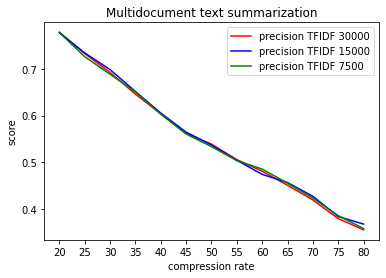

In [ ]:
TFIDF_precision = [TFIDF_precision_avg_score_20, TFIDF_precision_avg_score_25, TFIDF_precision_avg_score_30, TFIDF_precision_avg_score_35, TFIDF_precision_avg_score_40, TFIDF_precision_avg_score_45, TFIDF_precision_avg_score_50, TFIDF_precision_avg_score_55, TFIDF_precision_avg_score_60, TFIDF_precision_avg_score_65, TFIDF_precision_avg_score_70, TFIDF_precision_avg_score_75, TFIDF_precision_avg_score_80]
TFIDF_15000_precision = [TFIDF_15000_precision_avg_score_20, TFIDF_15000_precision_avg_score_25, TFIDF_15000_precision_avg_score_30, TFIDF_15000_precision_avg_score_35, TFIDF_15000_precision_avg_score_40, TFIDF_15000_precision_avg_score_45, TFIDF_15000_precision_avg_score_50, TFIDF_15000_precision_avg_score_55, TFIDF_15000_precision_avg_score_60, TFIDF_15000_precision_avg_score_65, TFIDF_15000_precision_avg_score_70, TFIDF_15000_precision_avg_score_75, TFIDF_15000_precision_avg_score_80]
TFIDF_7500_precision = [TFIDF_7500_precision_avg_score_20, TFIDF_7500_precision_avg_score_25, TFIDF_7500_precision_avg_score_30, TFIDF_7500_precision_avg_score_35, TFIDF_7500_precision_avg_score_40, TFIDF_7500_precision_avg_score_45, TFIDF_7500_precision_avg_score_50, TFIDF_7500_precision_avg_score_55, TFIDF_7500_precision_avg_score_60, TFIDF_7500_precision_avg_score_65, TFIDF_7500_precision_avg_score_70, TFIDF_7500_precision_avg_score_75, TFIDF_7500_precision_avg_score_80]

x1 = ['20', '25', '30', '35', '40', '45', '50', '55', '60', '65', '70', '75', '80']
y1 = TFIDF_precision
plt.plot(x1, y1, label= "precision TFIDF 30000", color= "red")

x2 = ['20', '25', '30', '35', '40', '45', '50', '55', '60', '65', '70', '75', '80'] 
y2 = TFIDF_15000_precision
plt.plot(x2, y2, label= "precision TFIDF 15000", color= "blue")

x3 = ['20', '25', '30', '35', '40', '45', '50', '55', '60', '65', '70', '75', '80']
y3 = TFIDF_7500_precision
plt.plot(x3, y3, label= "precision TFIDF 7500", color= "green")

plt.xlabel('compression rate')
plt.ylabel('score')
plt.title('Multidocument text summarization')
plt.legend()
plt.show() 


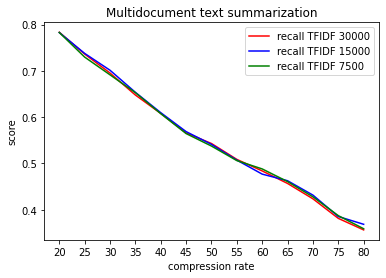

In [ ]:
TFIDF_recall = [TFIDF_recall_avg_score_20, TFIDF_recall_avg_score_25, TFIDF_recall_avg_score_30, TFIDF_recall_avg_score_35, TFIDF_recall_avg_score_40, TFIDF_recall_avg_score_45, TFIDF_recall_avg_score_50, TFIDF_recall_avg_score_55, TFIDF_recall_avg_score_60, TFIDF_recall_avg_score_65, TFIDF_recall_avg_score_70, TFIDF_recall_avg_score_75, TFIDF_recall_avg_score_80]
TFIDF_15000_recall = [TFIDF_15000_recall_avg_score_20, TFIDF_15000_recall_avg_score_25, TFIDF_15000_recall_avg_score_30, TFIDF_15000_recall_avg_score_35, TFIDF_15000_recall_avg_score_40, TFIDF_15000_recall_avg_score_45, TFIDF_15000_recall_avg_score_50, TFIDF_15000_recall_avg_score_55, TFIDF_15000_recall_avg_score_60, TFIDF_15000_recall_avg_score_65, TFIDF_15000_recall_avg_score_70, TFIDF_15000_recall_avg_score_75, TFIDF_15000_recall_avg_score_80]
TFIDF_7500_recall = [TFIDF_7500_recall_avg_score_20, TFIDF_7500_recall_avg_score_25, TFIDF_7500_recall_avg_score_30, TFIDF_7500_recall_avg_score_35, TFIDF_7500_recall_avg_score_40, TFIDF_7500_recall_avg_score_45, TFIDF_7500_recall_avg_score_50, TFIDF_7500_recall_avg_score_55, TFIDF_7500_recall_avg_score_60, TFIDF_7500_recall_avg_score_65, TFIDF_7500_recall_avg_score_70, TFIDF_7500_recall_avg_score_75, TFIDF_7500_recall_avg_score_80]

x1 = ['20', '25', '30', '35', '40', '45', '50', '55', '60', '65', '70', '75', '80']
y1 = TFIDF_recall
plt.plot(x1, y1, label= "recall TFIDF 30000", color= "red")

x2 = ['20', '25', '30', '35', '40', '45', '50', '55', '60', '65', '70', '75', '80']
y2 = TFIDF_15000_recall
plt.plot(x2, y2, label= "recall TFIDF 15000", color= "blue")

x3 = ['20', '25', '30', '35', '40', '45', '50', '55', '60', '65', '70', '75', '80']
y3 = TFIDF_7500_recall
plt.plot(x3, y3, label= "recall TFIDF 7500", color= "green") 

plt.xlabel('compression rate')
plt.ylabel('score')
plt.title('Multidocument text summarization')
plt.legend()
plt.show() 


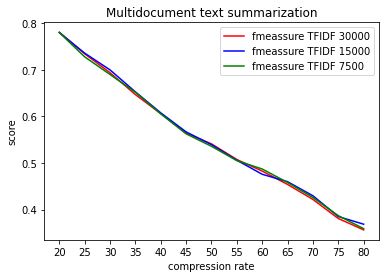

In [ ]:
TFIDF_fmeassure = [TFIDF_fmeassure_avg_score_20, TFIDF_fmeassure_avg_score_25, TFIDF_fmeassure_avg_score_30, TFIDF_fmeassure_avg_score_35, TFIDF_fmeassure_avg_score_40, TFIDF_fmeassure_avg_score_45, TFIDF_fmeassure_avg_score_50, TFIDF_fmeassure_avg_score_55, TFIDF_fmeassure_avg_score_60, TFIDF_fmeassure_avg_score_65, TFIDF_fmeassure_avg_score_70, TFIDF_fmeassure_avg_score_75, TFIDF_fmeassure_avg_score_80]
TFIDF_15000_fmeassure = [TFIDF_15000_fmeassure_avg_score_20, TFIDF_15000_fmeassure_avg_score_25, TFIDF_15000_fmeassure_avg_score_30, TFIDF_15000_fmeassure_avg_score_35, TFIDF_15000_fmeassure_avg_score_40, TFIDF_15000_fmeassure_avg_score_45, TFIDF_15000_fmeassure_avg_score_50, TFIDF_15000_fmeassure_avg_score_55, TFIDF_15000_fmeassure_avg_score_60, TFIDF_15000_fmeassure_avg_score_65, TFIDF_15000_fmeassure_avg_score_70, TFIDF_15000_fmeassure_avg_score_75, TFIDF_15000_fmeassure_avg_score_80]
TFIDF_7500_fmeassure = [TFIDF_7500_fmeassure_avg_score_20, TFIDF_7500_fmeassure_avg_score_25, TFIDF_7500_fmeassure_avg_score_30, TFIDF_7500_fmeassure_avg_score_35, TFIDF_7500_fmeassure_avg_score_40, TFIDF_7500_fmeassure_avg_score_45, TFIDF_7500_fmeassure_avg_score_50, TFIDF_7500_fmeassure_avg_score_55, TFIDF_7500_fmeassure_avg_score_60, TFIDF_7500_fmeassure_avg_score_65, TFIDF_7500_fmeassure_avg_score_70, TFIDF_7500_fmeassure_avg_score_75, TFIDF_7500_fmeassure_avg_score_80]

x1 = ['20', '25', '30', '35', '40', '45', '50', '55', '60', '65', '70', '75', '80']
y1 = TFIDF_fmeassure
plt.plot(x1, y1, label= "fmeassure TFIDF 30000", color= "red")

x2 = ['20', '25', '30', '35', '40', '45', '50', '55', '60', '65', '70', '75', '80']
y2 = TFIDF_15000_fmeassure
plt.plot(x2, y2, label= "fmeassure TFIDF 15000", color= "blue") 

x3 = ['20', '25', '30', '35', '40', '45', '50', '55', '60', '65', '70', '75', '80']
y3 = TFIDF_7500_fmeassure
plt.plot(x3, y3, label= "fmeassure TFIDF 7500", color= "green") 

plt.xlabel('compression rate')
plt.ylabel('score')
plt.title('Multidocument text summarization')
plt.legend()
plt.show() 